# TF-MoDISco

### Transcription-Factor Motif Discovery from Importance Scores

https://github.com/kundajelab/tfmodisco

Installation:
pip install modisco

This notebook uses code from the TF-MoDISco example notebook: https://github.com/kundajelab/tfmodisco/blob/master/examples/simulated_TAL_GATA_deeplearning/TF_MoDISco_TAL_GATA.ipynb 

#### Import modules

In [3]:
import numpy as np
import pandas as pd
import shap
import modisco
from modisco.visualization import viz_sequence

#### Import data

One-hot encoded sequences, hypothetical scores and contribution scores

Results from using DeepExplainer https://github.com/kundajelab/shap 

In [2]:
onehot = np.load("10bm_valid_one_hot.npy")
contribution_scores = np.load("contribution_scores.npy")
hypothetical_scores = np.load("hypothetical_scores.npy")

#### Filter out short sequences

In [69]:
idx = []
for i, sequence in enumerate(onehot):
    if sum(np.all(sequence == 0, axis=1)) < 100:
        idx.append(i)

fullonehot = onehot[idx]
fullcontrib = contribution_scores[idx]
fullhyp = hypothetical_scores[idx]

In [42]:
# Convert to length last for modicso-lite
onehot_llast = np.zeros((11187, 4, 200))
contribution_scores_llast = np.zeros((11187, 4, 200))
hypothetical_scores_llast = np.zeros((11187, 4, 200))

for s in range(11187):
    for p in range(200):
        onehot_llast[s, :, p] = onehot[s, p, :]
        contribution_scores_llast[s, :, p] = contribution_scores[s, p, :]
        hypothetical_scores_llast[s, :, p] = hypothetical_scores[s, p, :]

np.save("10bm_valid_one_hot_llast.npy", onehot_llast)
np.save("contribution_scores_llast.npy", contribution_scores_llast)
np.save("hypothetical_scores_llast.npy", hypothetical_scores_llast)

### Visualize

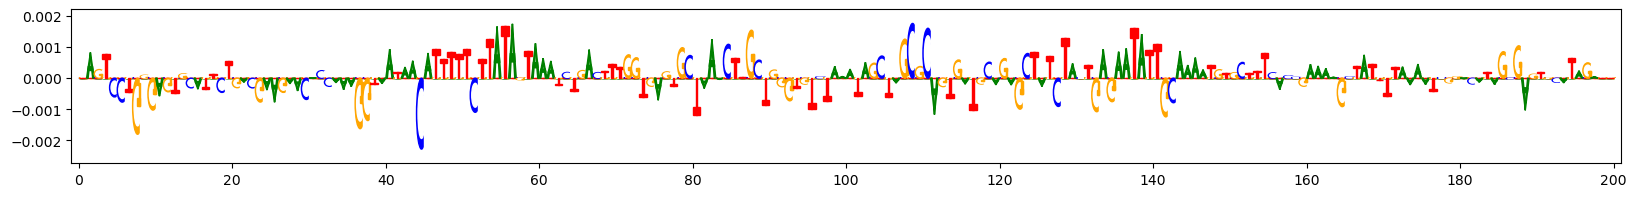

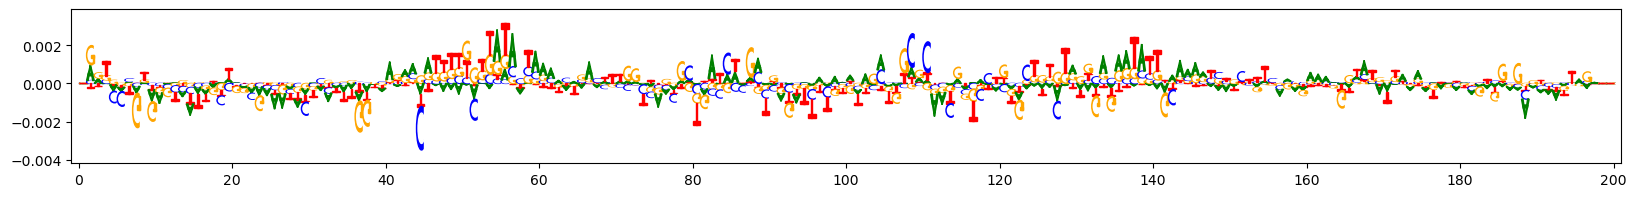

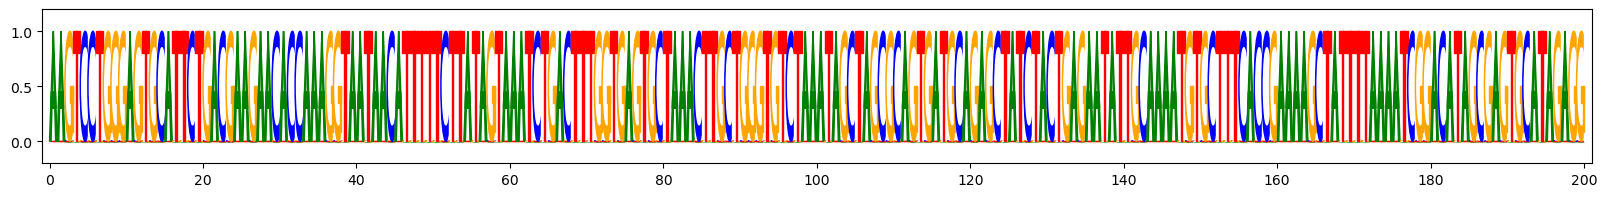

In [73]:
viz_sequence.plot_weights(contribution_scores[8], subticks_frequency=20)
viz_sequence.plot_weights(hypothetical_scores[8], subticks_frequency=20)
viz_sequence.plot_weights(onehot[8], subticks_frequency=20)

## Run modisco

MEMORY 4.2601472
On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= 1.7577019621149985e-07
Computing threshold
For increasing = True , the minimum IR precision was 0.4936065559028556 occurring at 0.0 implying a frac_neg of 0.9747491039954383
For increasing = False , the minimum IR precision was 0.0 occurring at -1.1944069320936578e-10 implying a frac_neg of 1.00000010000001e-07
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -4.193183704037651e-06  and  0.09257397201465212 with frac passing 0.3311907803683594
Passing windows frac was 0.3311907803683594 , which is above  0.2 ; adjusting
New thresholds are 0.015297810425894573 and -0.015297810425894573
Final raw thresholds are -0.015297810425894573  and  0.015297810425894573
Final transformed thresholds are -0.799999239555292  and  0.799999239555292


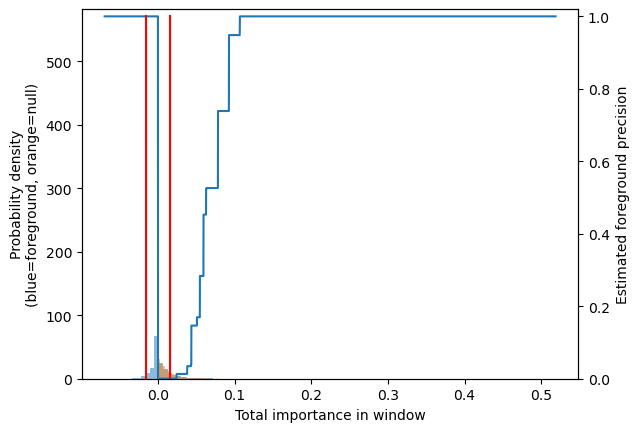

Got 9999 coords
After resolving overlaps, got 9999 seqlets
Across all tasks, the weakest transformed threshold used was: 0.799899239555292
MEMORY 3.787194368
9999 identified in total
Reducing weak_threshold_for_counting_sign to match weakest_transformed_thresh, from 0.8 to 0.799899239555292
2 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [6771, 3228]
Idx to activities:  {0: '1', 1: '-1'}
MEMORY 3.787194368
On metacluster 1
Metacluster size 3228
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 3228
(Round 1) Computing coarse affmat
MEMORY 3.787194368
Beginning embedding computation
MEMORY 3.787194368
At the beginning of embedding call
MEMORY 3.787194368
before computing embeddings fwd
MEMORY 3.787194368


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   21.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   36.6s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   56.7s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 3228 out of 3228 | elapsed:  2.4min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


after computing embeddings fwd
MEMORY 3.787255808


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   21.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   57.1s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 3228 out of 3228 | elapsed:  2.4min finished


after computing embeddings rev
MEMORY 3.787255808
before computing sparse embeddings fwd
MEMORY 3.787255808
Constructing csr matrix...
csr matrix made in 0.40715980529785156 s
after computing sparse embeddings fwd
MEMORY 3.787255808
before computing sparse embeddings rev
MEMORY 3.787255808
Constructing csr matrix...
csr matrix made in 0.421189546585083 s
after computing sparse embeddings rev
MEMORY 3.787255808
Finished embedding computation in 284.48 s
MEMORY 3.787255808
Starting affinity matrix computations
MEMORY 3.787255808
Batching in slices of size 3228


100%|███████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.17s/it]

Finished affinity matrix computations in 2.18 s
MEMORY 3.787255808


(Round 1) Computed coarse affmat
MEMORY 3.787255808
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 3.787255808
Launching nearest neighbors affmat calculation job
MEMORY 3.787255808
Parallel runs completed
MEMORY 3.787231232
Job completed in: 23.71 s
MEMORY 3.787231232
Launching nearest neighbors affmat calculation job
MEMORY 3.787231232
Parallel runs completed
MEMORY 3.787235328
Job completed in: 23.47 s
MEMORY 3.787235328
(Round 1) Computed affinity matrix on nearest neighbors in 48.1 s
MEMORY 3.787235328
Filtered down to 2681 of 3228
(Round 1) Retained 2681 rows out of 3228 after filtering
MEMORY 3.787235328
(Round 1) Computing density adapted affmat
MEMORY 3.787235328
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 3.787235328
Beginning preprocessing + Leiden
Affmat shape: 2681


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.1s


Quality: 0.3385063121395661
Quality: 0.3385598565588096
Quality: 0.33856312961449003
Got 3 clusters after round 1
Counts:
{1: 957, 0: 1329, 2: 395}
MEMORY 3.787235328
(Round 1) Aggregating seqlets in each cluster
MEMORY 3.787235328
Aggregating for cluster 0 with 1329 seqlets
MEMORY 3.787235328
Skipped 2 seqlets that went over the sequence edge during flank expansion


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   29.7s finished


Skipped 2 seqlets that went over the sequence edge during flank expansion
Removed 1 duplicate seqlets
Skipped 2 seqlets that went over the sequence edge during flank expansion
Removed 1 duplicate seqlets
Skipped 192 seqlets that went over sequence edge during flank expansion
Skipped 11 due to duplicates
Trimming eliminated 0 seqlets out of 1118
Skipped 33 seqlets that went over the sequence edge during flank expansion
[[0.26175115 0.1437788  0.19262673 0.21290323]
 [0.22764977 0.17880184 0.18248848 0.23041475]
 [0.23041475 0.17603687 0.15391705 0.26635945]
 [0.23041475 0.18525346 0.15760369 0.25714286]
 [0.2359447  0.20092166 0.16036866 0.23686636]
 [0.25253456 0.18525346 0.17050691 0.23041475]
 [0.25345622 0.18341014 0.16589862 0.24239631]
 [0.24331797 0.16497696 0.18801843 0.25069124]
 [0.24516129 0.19447005 0.1640553  0.24884793]
 [0.2516129  0.18986175 0.17880184 0.240553  ]
 [0.25253456 0.20276498 0.18064516 0.22857143]
 [0.23870968 0.21382488 0.16774194 0.25345622]
 [0.24147465 0

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   27.6s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   49.5s
[Parallel(n_jobs=4)]: Done 2082 out of 2082 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


after computing embeddings fwd
MEMORY 3.787235328


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   27.5s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   49.4s
[Parallel(n_jobs=4)]: Done 2082 out of 2082 | elapsed:  1.1min finished


after computing embeddings rev
MEMORY 3.787235328
before computing sparse embeddings fwd
MEMORY 3.787235328
Constructing csr matrix...
csr matrix made in 0.26265788078308105 s
after computing sparse embeddings fwd
MEMORY 3.787235328
before computing sparse embeddings rev
MEMORY 3.787235328
Constructing csr matrix...
csr matrix made in 0.25547337532043457 s
after computing sparse embeddings rev
MEMORY 3.787235328
Finished embedding computation in 131.59 s
MEMORY 3.787235328
Starting affinity matrix computations
MEMORY 3.787235328
Batching in slices of size 2082


100%|███████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]

Finished affinity matrix computations in 1.6 s
MEMORY 3.787235328


(Round 2) Computed coarse affmat
MEMORY 3.787235328
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 3.787235328
Launching nearest neighbors affmat calculation job
MEMORY 3.787235328
Parallel runs completed
MEMORY 3.787231232
Job completed in: 5.1 s
MEMORY 3.787231232
Launching nearest neighbors affmat calculation job
MEMORY 3.787231232
Parallel runs completed
MEMORY 3.787259904
Job completed in: 5.09 s
MEMORY 3.787247616
(Round 2) Computed affinity matrix on nearest neighbors in 10.98 s
MEMORY 3.787247616
Not applying filtering for rounds above first round
MEMORY 3.787247616
(Round 2) Computing density adapted affmat
MEMORY 3.787247616
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 3.787247616
Beginning preprocessing + Leiden
Affmat shape: 2082


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.1s


Quality: 0.3425111317895702
Quality: 0.3425124235699339
Quality: 0.34251373453668593
Got 3 clusters after round 2
Counts:
{2: 515, 1: 781, 0: 786}
MEMORY 3.787247616
(Round 2) Aggregating seqlets in each cluster
MEMORY 3.787247616
Aggregating for cluster 0 with 786 seqlets
MEMORY 3.787247616


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   24.8s finished


Skipped 4 due to duplicates
Trimming eliminated 0 seqlets out of 782
Skipped 3 seqlets that went over the sequence edge during flank expansion
[[0.20795892 0.22593068 0.22079589 0.22849807]
 [0.18998716 0.25288832 0.25288832 0.18998716]
 [0.24261874 0.2169448  0.20282413 0.22978177]
 [0.2195122  0.24646983 0.25417202 0.1758665 ]
 [0.21052632 0.24005135 0.24775353 0.20154044]
 [0.25288832 0.20667522 0.25160462 0.18998716]
 [0.2195122  0.24518614 0.25545571 0.18998716]
 [0.24261874 0.20924262 0.23748395 0.22464698]
 [0.2156611  0.22849807 0.27214377 0.20154044]
 [0.2182285  0.26700899 0.21437741 0.22079589]
 [0.2195122  0.23620026 0.25545571 0.21181001]
 [0.27214377 0.20795892 0.24005135 0.20795892]
 [0.22721438 0.25288832 0.27214377 0.18228498]
 [0.21437741 0.23363286 0.29653402 0.19897304]
 [0.22336329 0.24903723 0.26829268 0.20924262]
 [0.19512195 0.2618742  0.28498074 0.21052632]
 [0.25288832 0.24390244 0.29139923 0.18100128]
 [0.26957638 0.19897304 0.31964056 0.18870347]
 [0.1450577

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 779 out of 779 | elapsed:    0.5s finished


[t-SNE] Computed conditional probabilities for sample 779 / 779
[t-SNE] Mean sigma: 0.399114
Beginning preprocessing + Leiden
Affmat shape: 779


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s


Quality: 0.375351682394494
Quality: 0.3758552152896477
Quality: 0.3764180011984058
Quality: 0.3768437060189771
Got subclusters: Counter({0: 166, 1: 157, 2: 125, 3: 107, 4: 90, 5: 78, 6: 53, 7: 3})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    7.4s finished


Numbers for each pattern pre-subsample: [166, 157, 125, 107, 90, 78, 53, 3]
Numbers after subsampling: [166, 157, 125, 107, 90, 78, 53, 3]
Computing sims for pattern 0
Computed sims for pattern 0 in 1.574714183807373 s
Computing sims for pattern 1
Computed sims for pattern 1 in 1.4871220588684082 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.8742697238922119 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.9942381381988525 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.7877922058105469 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.8487491607666016 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.6639194488525391 s
Computing sims for pattern 7
example:1800,start:78,end:94,rc:False
example:2388,start:106,end:122,rc:True
example:1126,start:54,end:70,rc:True
example:1460,start:130,end:146,rc:True
example:410,start:26,end:42,rc:True
example:2827,start:101,end:117,rc:True
example:14,start:25,end:41,rc:False
ex

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 746 out of 746 | elapsed:    0.4s finished


[t-SNE] Computed conditional probabilities for sample 746 / 746
[t-SNE] Mean sigma: 0.414110
Beginning preprocessing + Leiden
Affmat shape: 746


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.2s


Quality: 0.40365432656549377
Quality: 0.4063782131068592
Got subclusters: Counter({0: 147, 2: 113, 1: 113, 3: 86, 4: 80, 5: 78, 6: 68, 7: 61})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.2s finished


Numbers for each pattern pre-subsample: [147, 113, 113, 86, 80, 78, 68, 61]
Numbers after subsampling: [147, 113, 113, 86, 80, 78, 68, 61]
Computing sims for pattern 0
Computed sims for pattern 0 in 1.2324280738830566 s
Computing sims for pattern 1
Computed sims for pattern 1 in 1.0286478996276855 s
Computing sims for pattern 2
Computed sims for pattern 2 in 1.0958430767059326 s
Computing sims for pattern 3
Computed sims for pattern 3 in 1.0132524967193604 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.738699197769165 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.9523696899414062 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.7991995811462402 s
Computing sims for pattern 7
Computed sims for pattern 7 in 0.6658804416656494 s
Cluster sizes
[147 113 113  86  80  78  68  61]
Cross-contamination matrix:
[[1.   0.31 0.55 0.51 0.33 0.47 0.52 0.63]
 [0.45 1.   0.57 0.6  0.52 0.59 0.59 0.61]
 [0.64 0.42 1.   0.55 0.64 0.57 0.65 0.71]
 [0.75 0.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 157 out of 157 | elapsed:    0.1s finished
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
Precomputed sparse input was not sorted by data.


[t-SNE] Iteration 200: error = 56.6922035, gradient norm = 0.4928355 (50 iterations in 0.030s)
[t-SNE] Iteration 250: error = 56.8334389, gradient norm = 0.5479875 (50 iterations in 0.022s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.833439
[t-SNE] Iteration 300: error = 0.8683155, gradient norm = 0.0145445 (50 iterations in 0.021s)
[t-SNE] Iteration 350: error = 0.7742075, gradient norm = 0.0010021 (50 iterations in 0.019s)
[t-SNE] Iteration 400: error = 0.7738215, gradient norm = 0.0003233 (50 iterations in 0.021s)
[t-SNE] Iteration 450: error = 0.7722005, gradient norm = 0.0007733 (50 iterations in 0.021s)
[t-SNE] Iteration 500: error = 0.7546731, gradient norm = 0.0004959 (50 iterations in 0.024s)
[t-SNE] Iteration 550: error = 0.7547032, gradient norm = 0.0002193 (50 iterations in 0.019s)
[t-SNE] Iteration 600: error = 0.7542124, gradient norm = 0.0003957 (50 iterations in 0.020s)
[t-SNE] Iteration 650: error = 0.7542689, gradient norm = 0.0001261 (50 it

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.2558248370158137
Quality: 0.2559650864003067
Quality: 0.25629884850003454
Quality: 0.2573634639917417


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 147 out of 147 | elapsed:    0.0s finished


Got subclusters: Counter({0: 30, 1: 27, 2: 25, 3: 23, 4: 19, 5: 18, 6: 15})
On pattern 1
[t-SNE] Computing 146 nearest neighbors...
[t-SNE] Indexed 147 samples in 0.001s...
[t-SNE] Computed neighbors for 147 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 147 / 147
[t-SNE] Mean sigma: 0.917254
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 57.4838257, gradient norm = 0.4888181 (50 iterations in 0.017s)
[t-SNE] Iteration 100: error = 57.7369652, gradient norm = 0.4813345 (50 iterations in 0.015s)
[t-SNE] Iteration 150: error = 57.5965042, gradient norm = 0.4947089 (50 iterations in 0.015s)
[t-SNE] Iteration 200: error = 60.4523315, gradient norm = 0.5178124 (50 iterations in 0.015s)
[t-SNE] Iteration 250: error = 56.1890717, gradient norm = 0.5372324 (50 iterations in 0.015s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.189072
[t-SNE] Iteration 300: error = 0.8447447, gradient norm = 0.0105918 (50 i

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.2315889525789792
Quality: 0.23159147620641912


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:    0.0s finished


Got subclusters: Counter({0: 41, 1: 36, 2: 23, 3: 21, 4: 19, 5: 7})
On pattern 2
[t-SNE] Computing 124 nearest neighbors...
[t-SNE] Indexed 125 samples in 0.003s...
[t-SNE] Computed neighbors for 125 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 125 / 125
[t-SNE] Mean sigma: 1.013369
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 56.6726494, gradient norm = 0.4581943 (50 iterations in 0.027s)
[t-SNE] Iteration 100: error = 53.8130722, gradient norm = 0.5532805 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 54.3334999, gradient norm = 0.4400361 (50 iterations in 0.013s)
[t-SNE] Iteration 200: error = 53.2066116, gradient norm = 0.5103832 (50 iterations in 0.012s)
[t-SNE] Iteration 250: error = 54.4125595, gradient norm = 0.5001288 (50 iterations in 0.012s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.412560
[t-SNE] Iteration 300: error = 0.7552454, gradient norm = 0.0174818 (50 iteration

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.2409631692202736
Quality: 0.2464795499350657
Quality: 0.24668645027953484
Quality: 0.24674848782827943


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 102 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 113 out of 113 | elapsed:    0.0s finished


Got subclusters: Counter({0: 40, 1: 39, 2: 24, 3: 13, 4: 9})
On pattern 3
[t-SNE] Computing 112 nearest neighbors...
[t-SNE] Indexed 113 samples in 0.002s...
[t-SNE] Computed neighbors for 113 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 113 / 113
[t-SNE] Mean sigma: 1.105987
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 52.5633888, gradient norm = 0.5856639 (50 iterations in 0.022s)
[t-SNE] Iteration 100: error = 54.3292274, gradient norm = 0.5467467 (50 iterations in 0.013s)
[t-SNE] Iteration 150: error = 52.0348244, gradient norm = 0.5961744 (50 iterations in 0.011s)
[t-SNE] Iteration 200: error = 51.5459938, gradient norm = 0.4699479 (50 iterations in 0.011s)
[t-SNE] Iteration 250: error = 52.0065308, gradient norm = 0.5382805 (50 iterations in 0.011s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.006531
[t-SNE] Iteration 300: error = 0.7075151, gradient norm = 0.0117615 (50 iterations in 0.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.24334410170458926
Quality: 0.24382358320051697
Quality: 0.2446839551418511
Quality: 0.24472978196319037


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 102 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 113 out of 113 | elapsed:    0.0s finished


Got subclusters: Counter({0: 30, 1: 28, 2: 21, 4: 17, 3: 17})
On pattern 4
[t-SNE] Computing 112 nearest neighbors...
[t-SNE] Indexed 113 samples in 0.002s...
[t-SNE] Computed neighbors for 113 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 113 / 113
[t-SNE] Mean sigma: 1.144100
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 55.3422852, gradient norm = 0.5119081 (50 iterations in 0.021s)
[t-SNE] Iteration 100: error = 52.9422455, gradient norm = 0.5306205 (50 iterations in 0.022s)
[t-SNE] Iteration 150: error = 52.5348892, gradient norm = 0.5465357 (50 iterations in 0.016s)
[t-SNE] Iteration 200: error = 53.6632538, gradient norm = 0.4845317 (50 iterations in 0.011s)
[t-SNE] Iteration 250: error = 52.5470886, gradient norm = 0.5509698 (50 iterations in 0.010s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.547089
[t-SNE] Iteration 300: error = 0.6818802, gradient norm = 0.0110314 (50 iterations in 0

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.2613426807428241
Quality: 0.2619814553762913
Quality: 0.2636784891663912


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 107 out of 107 | elapsed:    0.0s finished


Got subclusters: Counter({0: 38, 1: 36, 2: 21, 3: 18})
On pattern 5
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 107 samples in 0.001s...
[t-SNE] Computed neighbors for 107 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 107 / 107
[t-SNE] Mean sigma: 1.188275
[t-SNE] Computed conditional probabilities in 0.002s
[t-SNE] Iteration 50: error = 51.3391228, gradient norm = 0.4923267 (50 iterations in 0.019s)
[t-SNE] Iteration 100: error = 49.8491745, gradient norm = 0.5650306 (50 iterations in 0.013s)
[t-SNE] Iteration 150: error = 50.2750702, gradient norm = 0.4211969 (50 iterations in 0.013s)
[t-SNE] Iteration 200: error = 52.3154297, gradient norm = 0.4617152 (50 iterations in 0.013s)
[t-SNE] Iteration 250: error = 53.8032494, gradient norm = 0.5183399 (50 iterations in 0.013s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.803249
[t-SNE] Iteration 300: error = 0.6246108, gradient norm = 0.0180112 (50 iterations in 0.012s)


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.2163287593521407
Quality: 0.21928030310972527
Quality: 0.22230662979970534
Quality: 0.2225431580836026
Quality: 0.22256596881545837


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.0s finished


Got subclusters: Counter({0: 24, 1: 23, 2: 21, 3: 20, 4: 19})
On pattern 6
[t-SNE] Computing 89 nearest neighbors...
[t-SNE] Indexed 90 samples in 0.002s...
[t-SNE] Computed neighbors for 90 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 90 / 90
[t-SNE] Mean sigma: 1.316325
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 49.0708618, gradient norm = 0.5235642 (50 iterations in 0.022s)
[t-SNE] Iteration 100: error = 51.2517586, gradient norm = 0.4964674 (50 iterations in 0.018s)
[t-SNE] Iteration 150: error = 50.6021118, gradient norm = 0.5992143 (50 iterations in 0.015s)
[t-SNE] Iteration 200: error = 49.0737915, gradient norm = 0.6063015 (50 iterations in 0.009s)
[t-SNE] Iteration 250: error = 51.3585472, gradient norm = 0.4642411 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.358547
[t-SNE] Iteration 300: error = 0.7630886, gradient norm = 0.0090735 (50 iterations in 0.009s

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.20043248272780081


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  74 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  86 out of  86 | elapsed:    0.0s finished


Got subclusters: Counter({0: 33, 1: 24, 2: 21, 3: 12})
On pattern 7
[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 86 samples in 0.001s...
[t-SNE] Computed neighbors for 86 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 86 / 86
[t-SNE] Mean sigma: 1.434387
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 46.8660736, gradient norm = 0.5723514 (50 iterations in 0.018s)
[t-SNE] Iteration 100: error = 49.9071350, gradient norm = 0.5383251 (50 iterations in 0.018s)
[t-SNE] Iteration 150: error = 47.1774254, gradient norm = 0.5703687 (50 iterations in 0.014s)
[t-SNE] Iteration 200: error = 48.1500740, gradient norm = 0.5414163 (50 iterations in 0.010s)
[t-SNE] Iteration 250: error = 49.2218895, gradient norm = 0.5276771 (50 iterations in 0.010s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.221889
[t-SNE] Iteration 300: error = 0.8303518, gradient norm = 0.0060884 (50 iterations in 0.010s)
[t-SN

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.20986227000893787
Quality: 0.21094797302095156


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished


Got subclusters: Counter({0: 30, 1: 27, 2: 17, 3: 12})
On pattern 8
[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.001s...
[t-SNE] Computed neighbors for 80 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 1.435943
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 51.1649094, gradient norm = 0.5259017 (50 iterations in 0.016s)
[t-SNE] Iteration 100: error = 47.0828094, gradient norm = 0.4998176 (50 iterations in 0.015s)
[t-SNE] Iteration 150: error = 47.6975899, gradient norm = 0.5971895 (50 iterations in 0.015s)
[t-SNE] Iteration 200: error = 50.4308662, gradient norm = 0.5593461 (50 iterations in 0.010s)
[t-SNE] Iteration 250: error = 50.1263428, gradient norm = 0.4533718 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.126343
[t-SNE] Iteration 300: error = 0.8044111, gradient norm = 0.0047710 (50 iterations in 0.009s)
[t-SN

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.21469436510369053
Quality: 0.21498596913858478


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  78 out of  78 | elapsed:    0.0s finished


Got subclusters: Counter({0: 32, 1: 19, 2: 15, 3: 14})
On pattern 9
[t-SNE] Computing 77 nearest neighbors...
[t-SNE] Indexed 78 samples in 0.000s...
[t-SNE] Computed neighbors for 78 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 78 / 78
[t-SNE] Mean sigma: 1.469106
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 47.8703918, gradient norm = 0.5120646 (50 iterations in 0.015s)
[t-SNE] Iteration 100: error = 48.5355530, gradient norm = 0.5278589 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 48.2040176, gradient norm = 0.4515004 (50 iterations in 0.007s)
[t-SNE] Iteration 200: error = 48.3019485, gradient norm = 0.4882928 (50 iterations in 0.007s)
[t-SNE] Iteration 250: error = 47.3647308, gradient norm = 0.5737154 (50 iterations in 0.007s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.364731
[t-SNE] Iteration 300: error = 0.8232201, gradient norm = 0.0065765 (50 iterations in 0.008s)
[t-SN

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.17495808075364738
Quality: 0.17501448200187686


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  78 out of  78 | elapsed:    0.0s finished


Got subclusters: Counter({1: 22, 0: 22, 2: 18, 3: 16})
On pattern 10
[t-SNE] Computing 77 nearest neighbors...
[t-SNE] Indexed 78 samples in 0.001s...
[t-SNE] Computed neighbors for 78 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 78 / 78
[t-SNE] Mean sigma: 1.377967
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 48.8232460, gradient norm = 0.5964609 (50 iterations in 0.016s)
[t-SNE] Iteration 100: error = 47.3066216, gradient norm = 0.6386361 (50 iterations in 0.014s)
[t-SNE] Iteration 150: error = 46.0677567, gradient norm = 0.5896868 (50 iterations in 0.009s)
[t-SNE] Iteration 200: error = 49.2366219, gradient norm = 0.5218902 (50 iterations in 0.009s)
[t-SNE] Iteration 250: error = 46.0918732, gradient norm = 0.5896124 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.091873
[t-SNE] Iteration 300: error = 0.7578703, gradient norm = 0.0036554 (50 iterations in 0.008s)
[t-S

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.17270825604577977


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 out of  68 | elapsed:    0.0s finished


Got subclusters: Counter({0: 23, 3: 15, 2: 15, 1: 15, 4: 10})
On pattern 11
[t-SNE] Computing 67 nearest neighbors...
[t-SNE] Indexed 68 samples in 0.000s...
[t-SNE] Computed neighbors for 68 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 68 / 68
[t-SNE] Mean sigma: 1.576384
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 48.2209702, gradient norm = 0.4390063 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 46.9649124, gradient norm = 0.5332770 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 45.8962784, gradient norm = 0.5195864 (50 iterations in 0.011s)
[t-SNE] Iteration 200: error = 46.0629768, gradient norm = 0.5979037 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 43.0144043, gradient norm = 0.6282739 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.014404
[t-SNE] Iteration 300: error = 0.8954340, gradient norm = 0.0016206 (50 iterations in 0.008

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.8s


Quality: 0.138720540247673
Quality: 0.1404871683860471


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  54 out of  61 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  61 out of  61 | elapsed:    0.0s finished


Got subclusters: Counter({0: 23, 1: 15, 2: 14, 3: 11, 4: 5})
On pattern 12
[t-SNE] Computing 60 nearest neighbors...
[t-SNE] Indexed 61 samples in 0.000s...
[t-SNE] Computed neighbors for 61 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 61 / 61
[t-SNE] Mean sigma: 1.760523
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 47.1159973, gradient norm = 0.5558502 (50 iterations in 0.013s)
[t-SNE] Iteration 100: error = 45.6751633, gradient norm = 0.6002914 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 45.0419388, gradient norm = 0.5545180 (50 iterations in 0.007s)
[t-SNE] Iteration 200: error = 44.9454727, gradient norm = 0.4154250 (50 iterations in 0.007s)
[t-SNE] Iteration 250: error = 45.7218933, gradient norm = 0.5276741 (50 iterations in 0.007s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.721893
[t-SNE] Iteration 300: error = 0.8162953, gradient norm = 0.0013311 (50 iterations in 0.007s

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.10345935687604388
Got subclusters: Counter({0: 27, 1: 17, 2: 17})
On pattern 13
[t-SNE] Computing 52 nearest neighbors...
[t-SNE] Indexed 53 samples in 0.000s...
[t-SNE] Computed neighbors for 53 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 53 / 53
[t-SNE] Mean sigma: 3.181686
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 44.6142883, gradient norm = 0.3747618 (50 iterations in 0.008s)
[t-SNE] Iteration 100: error = 44.0484161, gradient norm = 0.6036160 (50 iterations in 0.007s)
[t-SNE] Iteration 150: error = 43.5034256, gradient norm = 0.3266346 (50 iterations in 0.007s)
[t-SNE] Iteration 200: error = 43.7362251, gradient norm = 0.4728601 (50 iterations in 0.007s)
[t-SNE] Iteration 250: error = 43.2010155, gradient norm = 0.4875011 (50 iterations in 0.007s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.201015
[t-SNE] Iteration 300: error = 0.7407297, gradient norm = 0.0016463 (50 iter

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  53 out of  53 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 53
Quality: 0.042936914664226535
Got subclusters: Counter({0: 28, 1: 22, 2: 3})
On metacluster 0
Metacluster size 6771
Relevant tasks:  ('task0',)
Relevant signs:  (1,)


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished


TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 6771
(Round 1) Computing coarse affmat
MEMORY 3.787247616
Beginning embedding computation
MEMORY 3.787247616
At the beginning of embedding call
MEMORY 3.787247616
before computing embeddings fwd
MEMORY 3.787247616


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   28.1s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   50.2s
[Parallel(n_jobs=4)]: Done 2476 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 3576 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 4876 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 6376 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 6764 out of 6771 | elapsed:  3.7min remaining:    0.2s
[Parallel(n_jobs=4)]: Done 6771 out of 6771 | elapsed:  3.7min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


after computing embeddings fwd
MEMORY 3.787247616


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   28.0s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   50.0s
[Parallel(n_jobs=4)]: Done 2476 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 3576 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 4876 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 6376 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 6764 out of 6771 | elapsed:  3.7min remaining:    0.2s
[Parallel(n_jobs=4)]: Done 6771 out of 6771 | elapsed:  3.7min finished


after computing embeddings rev
MEMORY 3.812245504
before computing sparse embeddings fwd
MEMORY 3.812245504
Constructing csr matrix...
csr matrix made in 0.8475074768066406 s
after computing sparse embeddings fwd
MEMORY 3.8124544
before computing sparse embeddings rev
MEMORY 3.8124544
Constructing csr matrix...
csr matrix made in 0.8389527797698975 s
after computing sparse embeddings rev
MEMORY 3.8124544
Finished embedding computation in 450.57 s
MEMORY 3.790708736
Starting affinity matrix computations
MEMORY 3.790708736
Batching in slices of size 6771


100%|███████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.58s/it]

Finished affinity matrix computations in 6.61 s
MEMORY 3.790708736
(Round 1) Computed coarse affmat
MEMORY 3.790184448


(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 3.790184448
Launching nearest neighbors affmat calculation job
MEMORY 3.790184448
Parallel runs completed
MEMORY 3.790168064
Job completed in: 48.75 s
MEMORY 3.790168064
Launching nearest neighbors affmat calculation job
MEMORY 3.790168064
Parallel runs completed
MEMORY 3.79017216
Job completed in: 49.15 s
MEMORY 3.79017216
(Round 1) Computed affinity matrix on nearest neighbors in 99.3 s
MEMORY 3.79017216
Filtered down to 6253 of 6771
(Round 1) Retained 6253 rows out of 6771 after filtering
MEMORY 3.79017216
(Round 1) Computing density adapted affmat
MEMORY 3.79017216
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 3.790757888
Beginning preprocessing + Leiden
Affmat shape: 6253


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min


Quality: 0.48681929131444734
Got 4 clusters after round 1
Counts:
{2: 879, 3: 360, 1: 2036, 0: 2978}
MEMORY 3.8074368
(Round 1) Aggregating seqlets in each cluster
MEMORY 3.8074368
Aggregating for cluster 0 with 2978 seqlets
MEMORY 3.8074368
Skipped 3 seqlets that went over the sequence edge during flank expansion


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.7min finished


Skipped 4 seqlets that went over the sequence edge during flank expansion
Skipped 3 seqlets that went over the sequence edge during flank expansion
Removed 2 duplicate seqlets
Skipped 1 seqlets that went over the sequence edge during flank expansion
Removed 14 duplicate seqlets
Skipped 477 seqlets that went over sequence edge during flank expansion
Skipped 145 due to duplicates
Trimming eliminated 0 seqlets out of 2329
Skipped 72 seqlets that went over the sequence edge during flank expansion
[[0.20691183 0.19982277 0.21400089 0.22020381]
 [0.20912716 0.19406292 0.21089942 0.23216659]
 [0.20868409 0.21311475 0.20646876 0.22108994]
 [0.2255206  0.20159504 0.21178556 0.21621622]
 [0.21754541 0.21001329 0.21665928 0.21710235]
 [0.21843155 0.19051839 0.23748339 0.22108994]
 [0.22286221 0.2046965  0.22153301 0.22153301]
 [0.23659725 0.21665928 0.21267169 0.20957023]
 [0.22463447 0.21045636 0.22064688 0.22596367]
 [0.23172353 0.20691183 0.228179   0.22108994]
 [0.2255206  0.18653079 0.241027

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   27.4s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   49.4s
[Parallel(n_jobs=4)]: Done 2476 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 3576 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 4782 out of 4789 | elapsed:  2.5min remaining:    0.2s
[Parallel(n_jobs=4)]: Done 4789 out of 4789 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


after computing embeddings fwd
MEMORY 3.8074368


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   27.6s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   49.5s
[Parallel(n_jobs=4)]: Done 2476 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 3576 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 4782 out of 4789 | elapsed:  2.5min remaining:    0.2s
[Parallel(n_jobs=4)]: Done 4789 out of 4789 | elapsed:  2.5min finished


after computing embeddings rev
MEMORY 3.8509568
before computing sparse embeddings fwd
MEMORY 3.8509568
Constructing csr matrix...
csr matrix made in 0.605823278427124 s
after computing sparse embeddings fwd
MEMORY 3.8509568
before computing sparse embeddings rev
MEMORY 3.8509568
Constructing csr matrix...
csr matrix made in 0.5912606716156006 s
after computing sparse embeddings rev
MEMORY 3.8509568
Finished embedding computation in 302.04 s
MEMORY 3.810889728
Starting affinity matrix computations
MEMORY 3.810889728
Batching in slices of size 4789


100%|███████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.78s/it]

Finished affinity matrix computations in 3.8 s
MEMORY 3.810889728


(Round 2) Computed coarse affmat
MEMORY 3.810103296
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 3.810103296
Launching nearest neighbors affmat calculation job
MEMORY 3.810103296
Parallel runs completed
MEMORY 3.810111488
Job completed in: 11.06 s
MEMORY 3.809849344
Launching nearest neighbors affmat calculation job
MEMORY 3.809849344
Parallel runs completed
MEMORY 3.809837056
Job completed in: 11.05 s
MEMORY 3.809837056
(Round 2) Computed affinity matrix on nearest neighbors in 23.3 s
MEMORY 3.809837056
Not applying filtering for rounds above first round
MEMORY 3.809837056
(Round 2) Computing density adapted affmat
MEMORY 3.809837056
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 3.809693696
Beginning preprocessing + Leiden
Affmat shape: 4789


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   55.4s


Quality: 0.49396780153218217
Quality: 0.49396818363532025
Got 4 clusters after round 2
Counts:
{0: 2241, 2: 612, 1: 1663, 3: 273}
MEMORY 3.81046784
(Round 2) Aggregating seqlets in each cluster
MEMORY 3.81046784
Aggregating for cluster 0 with 2241 seqlets
MEMORY 3.81046784


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.1min finished


Removed 3 duplicate seqlets
Skipped 93 due to duplicates
Trimming eliminated 0 seqlets out of 2145
[[0.23170163 0.20512821 0.22937063 0.23170163]
 [0.22797203 0.22564103 0.21631702 0.23682984]
 [0.24615385 0.21911422 0.22237762 0.22377622]
 [0.25174825 0.21165501 0.23682984 0.21585082]
 [0.23449883 0.23682984 0.23123543 0.22284382]
 [0.24755245 0.23729604 0.20839161 0.24102564]
 [0.24009324 0.23356643 0.22610723 0.24289044]
 [0.24055944 0.24801865 0.22890443 0.23123543]
 [0.20885781 0.26666667 0.24475524 0.23822844]
 [0.23076923 0.24428904 0.23356643 0.25547786]
 [0.21678322 0.27272727 0.26759907 0.21491841]
 [0.24335664 0.26386946 0.24615385 0.22377622]
 [0.24662005 0.22983683 0.32867133 0.17902098]
 [0.24615385 0.23356643 0.32214452 0.18368298]
 [0.22097902 0.22097902 0.37109557 0.17529138]
 [0.14219114 0.11142191 0.59300699 0.14358974]
 [0.17529138 0.2037296  0.45967366 0.15757576]
 [0.20885781 0.11561772 0.52214452 0.15337995]
 [0.05081585 0.05687646 0.82890443 0.06340326]
 [0.0540

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 2138 out of 2145 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 2145 out of 2145 | elapsed:    4.6s finished


[t-SNE] Computed conditional probabilities for sample 1000 / 2145
[t-SNE] Computed conditional probabilities for sample 2000 / 2145
[t-SNE] Computed conditional probabilities for sample 2145 / 2145
[t-SNE] Mean sigma: 0.349933
Beginning preprocessing + Leiden
Affmat shape: 2145


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.0s


Quality: 0.4122915302346376
Quality: 0.41260806426825175
Quality: 0.41568533024348525
Quality: 0.4158127972506541


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   28.6s finished


Got subclusters: Counter({0: 371, 1: 335, 2: 297, 3: 274, 4: 264, 5: 260, 6: 152, 7: 149, 8: 43})
On merging iteration 1
Numbers for each pattern pre-subsample: [371, 335, 297, 274, 264, 260, 152, 149, 43]
Numbers after subsampling: [300, 300, 297, 274, 264, 260, 152, 149, 43]
Computing sims for pattern 0
Computed sims for pattern 0 in 2.903235912322998 s
Computing sims for pattern 1
Computed sims for pattern 1 in 2.7913382053375244 s
Computing sims for pattern 2
Computed sims for pattern 2 in 2.8160314559936523 s
Computing sims for pattern 3
Computed sims for pattern 3 in 2.369633674621582 s
Computing sims for pattern 4
Computed sims for pattern 4 in 2.325556993484497 s
Computing sims for pattern 5
Computed sims for pattern 5 in 2.1715915203094482 s
Computing sims for pattern 6
Computed sims for pattern 6 in 1.7908141613006592 s
Computing sims for pattern 7
Computed sims for pattern 7 in 1.7904584407806396 s
Computing sims for pattern 8
Computed sims for pattern 8 in 0.767202138900756

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1604 out of 1604 | elapsed:    2.2s finished


[t-SNE] Computed conditional probabilities for sample 1000 / 1604
[t-SNE] Computed conditional probabilities for sample 1604 / 1604
[t-SNE] Mean sigma: 0.349963
Beginning preprocessing + Leiden
Affmat shape: 1604


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.8s


Quality: 0.42262400158841656
Quality: 0.4255836120458731
Quality: 0.425737975191998
Quality: 0.42691317155678377


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   19.7s finished


Got subclusters: Counter({0: 303, 1: 240, 2: 207, 3: 186, 4: 178, 5: 160, 6: 150, 7: 61, 8: 56, 9: 52, 10: 11})
On merging iteration 1
Numbers for each pattern pre-subsample: [303, 240, 207, 186, 178, 160, 150, 61, 56, 52, 11]
Numbers after subsampling: [300, 240, 207, 186, 178, 160, 150, 61, 56, 52, 11]
Computing sims for pattern 0
Computed sims for pattern 0 in 3.4473750591278076 s
Computing sims for pattern 1
Computed sims for pattern 1 in 2.880601406097412 s
Computing sims for pattern 2
Computed sims for pattern 2 in 2.0242249965667725 s
Computing sims for pattern 3
Computed sims for pattern 3 in 2.0111918449401855 s
Computing sims for pattern 4
Computed sims for pattern 4 in 2.5465927124023438 s
Computing sims for pattern 5
Computed sims for pattern 5 in 2.1297709941864014 s
Computing sims for pattern 6
Computed sims for pattern 6 in 1.9899842739105225 s
Computing sims for pattern 7
Computed sims for pattern 7 in 0.9955999851226807 s
Computing sims for pattern 8
Computed sims for 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    0.3s finished


[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 0.380226
Beginning preprocessing + Leiden
Affmat shape: 600


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.3s


Quality: 0.43950829470556324
Quality: 0.4396998756579335
Quality: 0.43983135944890095
Quality: 0.4399293608282174
Got subclusters: Counter({0: 151, 1: 144, 2: 138, 3: 114, 4: 35, 5: 18})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    5.1s finished


Numbers for each pattern pre-subsample: [151, 144, 138, 114, 35, 18]
Numbers after subsampling: [151, 144, 138, 114, 35, 18]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.9083764553070068 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.7931632995605469 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.7381482124328613 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.6532652378082275 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.3788447380065918 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.25229334831237793 s
Cluster sizes
[151 144 138 114  35  18]
Cross-contamination matrix:
[[1.   0.4  0.27 0.69 0.76 0.22]
 [0.53 1.   0.64 0.57 0.81 0.6 ]
 [0.45 0.81 1.   0.65 0.71 0.86]
 [0.9  0.61 0.55 1.   0.94 0.41]
 [0.72 0.58 0.38 0.69 1.   0.34]
 [0.11 0.3  0.35 0.16 0.22 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.65 0.59 0.89 0.87 0.47]
 [0.65 1.   0.89 0.76 0.8  0.73]
 [0.59 0.89 1.   0.74 0.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed:    0.1s finished


[t-SNE] Computed conditional probabilities for sample 260 / 260
[t-SNE] Mean sigma: 0.378844
Beginning preprocessing + Leiden
Affmat shape: 260


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.4s


Quality: 0.35814293581833545
Quality: 0.3593647633714811
Quality: 0.3594595200797572
Quality: 0.35949454390237345
Quality: 0.3602787577521931
Got subclusters: Counter({0: 82, 1: 54, 2: 47, 3: 41, 4: 27, 5: 5, 6: 4})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.8s finished


Numbers for each pattern pre-subsample: [82, 54, 47, 41, 27, 5, 4]
Numbers after subsampling: [82, 54, 47, 41, 27, 5, 4]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.5315914154052734 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.3648693561553955 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.2935936450958252 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.1949455738067627 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.16972899436950684 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.07046627998352051 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.0650169849395752 s
Cluster sizes
[82 54 47 41 27  5  4]
Cross-contamination matrix:
[[1.   0.82 0.8  0.62 0.84 0.61 0.83]
 [0.28 1.   0.78 0.81 0.56 0.6  0.04]
 [0.37 0.86 1.   0.8  0.63 0.65 0.16]
 [0.24 0.77 0.7  1.   0.52 0.53 0.09]
 [0.7  0.99 0.95 0.9  1.   0.76 0.37]
 [0.31 0.62 0.6  0.61 0.5  1.   0.13]
 [0.1  0.   0.   

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1128 out of 1128 | elapsed:    1.0s finished
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
Precomputed sparse input was not sorted by data.


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1128 samples in 0.008s...
[t-SNE] Computed neighbors for 1128 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1128
[t-SNE] Computed conditional probabilities for sample 1128 / 1128
[t-SNE] Mean sigma: 0.647324
[t-SNE] Computed conditional probabilities in 0.034s
[t-SNE] Iteration 50: error = 66.8092499, gradient norm = 0.2479675 (50 iterations in 0.178s)
[t-SNE] Iteration 100: error = 66.5067291, gradient norm = 0.2506257 (50 iterations in 0.176s)
[t-SNE] Iteration 150: error = 67.0043259, gradient norm = 0.2390169 (50 iterations in 0.148s)
[t-SNE] Iteration 200: error = 66.9431839, gradient norm = 0.2500083 (50 iterations in 0.134s)
[t-SNE] Iteration 250: error = 66.5122757, gradient norm = 0.2390439 (50 iterations in 0.149s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.512276
[t-SNE] Iteration 300: error = 2.1940746, gradient norm = 0.0016713 (50 iterations in 0.129s

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.6s


Quality: 0.3829982886301433
Quality: 0.38576050243476656
Quality: 0.38712214343859874
Quality: 0.38972605207287375
Quality: 0.3903273825494385


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   11.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Got subclusters: Counter({0: 229, 1: 159, 2: 147, 3: 137, 4: 110, 5: 106, 6: 96, 7: 78, 8: 66})
On pattern 1


[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 760 out of 760 | elapsed:    0.4s finished


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 760 samples in 0.005s...
[t-SNE] Computed neighbors for 760 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 760 / 760
[t-SNE] Mean sigma: 0.611016
[t-SNE] Computed conditional probabilities in 0.021s
[t-SNE] Iteration 50: error = 65.9325714, gradient norm = 0.3944832 (50 iterations in 0.089s)
[t-SNE] Iteration 100: error = 68.8277054, gradient norm = 0.3539878 (50 iterations in 0.092s)
[t-SNE] Iteration 150: error = 69.3992310, gradient norm = 0.3463092 (50 iterations in 0.092s)
[t-SNE] Iteration 200: error = 69.0559540, gradient norm = 0.3705378 (50 iterations in 0.086s)
[t-SNE] Iteration 250: error = 68.7965851, gradient norm = 0.3709128 (50 iterations in 0.103s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.796585
[t-SNE] Iteration 300: error = 1.8281653, gradient norm = 0.0021464 (50 iterations in 0.095s)
[t-SNE] Iteration 350: error = 1.7208177, gradient norm = 0.0019943 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s


Quality: 0.3982116993870626
Quality: 0.39973382994014134
Quality: 0.4046470436609345
Quality: 0.4047346069285472


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    7.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Got subclusters: Counter({0: 154, 1: 149, 2: 127, 3: 121, 4: 99, 5: 70, 6: 40})
On pattern 2


[Parallel(n_jobs=4)]: Done 241 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 371 out of 371 | elapsed:    0.2s finished


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 371 samples in 0.003s...
[t-SNE] Computed neighbors for 371 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 371 / 371
[t-SNE] Mean sigma: 0.751192
[t-SNE] Computed conditional probabilities in 0.010s
[t-SNE] Iteration 50: error = 65.0835114, gradient norm = 0.5106375 (50 iterations in 0.036s)
[t-SNE] Iteration 100: error = 66.2228317, gradient norm = 0.4925536 (50 iterations in 0.032s)
[t-SNE] Iteration 150: error = 68.6863708, gradient norm = 0.4710761 (50 iterations in 0.033s)
[t-SNE] Iteration 200: error = 68.4062042, gradient norm = 0.4727964 (50 iterations in 0.041s)
[t-SNE] Iteration 250: error = 68.4501343, gradient norm = 0.4791803 (50 iterations in 0.034s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.450134
[t-SNE] Iteration 300: error = 1.4915059, gradient norm = 0.0038202 (50 iterations in 0.039s)
[t-SNE] Iteration 350: error = 1.3972954, gradient norm = 0.0025657 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s


Quality: 0.32168736150033456
Quality: 0.3238353346607733
Quality: 0.323907762604676
Quality: 0.32456785283395717
Quality: 0.3251100928838738
Quality: 0.32620807348200764


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 224 tasks      | elapsed:    0.1s


Got subclusters: Counter({0: 60, 1: 58, 2: 49, 3: 48, 4: 46, 5: 45, 6: 44, 7: 21})
On pattern 3


[Parallel(n_jobs=4)]: Done 328 out of 335 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 335 out of 335 | elapsed:    0.1s finished


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 335 samples in 0.002s...
[t-SNE] Computed neighbors for 335 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 335 / 335
[t-SNE] Mean sigma: 0.712332
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 63.9096680, gradient norm = 0.4881890 (50 iterations in 0.031s)
[t-SNE] Iteration 100: error = 62.5088005, gradient norm = 0.5121328 (50 iterations in 0.029s)
[t-SNE] Iteration 150: error = 67.6521988, gradient norm = 0.4760788 (50 iterations in 0.029s)
[t-SNE] Iteration 200: error = 66.0150299, gradient norm = 0.5137029 (50 iterations in 0.030s)
[t-SNE] Iteration 250: error = 66.2394028, gradient norm = 0.4710287 (50 iterations in 0.030s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.239403
[t-SNE] Iteration 300: error = 1.2859576, gradient norm = 0.0045324 (50 iterations in 0.036s)
[t-SNE] Iteration 350: error = 1.2243874, gradient norm = 0.0014933 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s


Quality: 0.3346354169146447
Quality: 0.33900939541425
Quality: 0.3390691340034267
Quality: 0.33959502386293383
Quality: 0.33980164275027763


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 235 tasks      | elapsed:    0.1s


Got subclusters: Counter({0: 62, 1: 55, 2: 52, 3: 49, 4: 45, 5: 38, 6: 34})
On pattern 4


[Parallel(n_jobs=4)]: Done 303 out of 303 | elapsed:    0.1s finished


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.002s...
[t-SNE] Computed neighbors for 303 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 0.701103
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 64.4424820, gradient norm = 0.4913440 (50 iterations in 0.034s)
[t-SNE] Iteration 100: error = 63.6672592, gradient norm = 0.4851492 (50 iterations in 0.028s)
[t-SNE] Iteration 150: error = 64.3720474, gradient norm = 0.4999701 (50 iterations in 0.028s)
[t-SNE] Iteration 200: error = 62.4138680, gradient norm = 0.5077066 (50 iterations in 0.027s)
[t-SNE] Iteration 250: error = 66.1630936, gradient norm = 0.4649292 (50 iterations in 0.028s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.163094
[t-SNE] Iteration 300: error = 1.2194051, gradient norm = 0.0046054 (50 iterations in 0.025s)
[t-SNE] Iteration 350: error = 1.1129023, gradient norm = 0.0026529 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s


Quality: 0.350614709749895
Quality: 0.3520493717560493
Quality: 0.3524990390649431


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 294 out of 294 | elapsed:    0.1s finished


Got subclusters: Counter({1: 56, 0: 56, 2: 55, 3: 48, 4: 44, 5: 28, 6: 16})
On pattern 5
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 294 samples in 0.005s...
[t-SNE] Computed neighbors for 294 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 294 / 294
[t-SNE] Mean sigma: 0.652742
[t-SNE] Computed conditional probabilities in 0.024s
[t-SNE] Iteration 50: error = 63.3986168, gradient norm = 0.4847543 (50 iterations in 0.057s)
[t-SNE] Iteration 100: error = 67.0077362, gradient norm = 0.4525695 (50 iterations in 0.039s)
[t-SNE] Iteration 150: error = 72.8675995, gradient norm = 0.4301504 (50 iterations in 0.040s)
[t-SNE] Iteration 200: error = 71.8070908, gradient norm = 0.4458655 (50 iterations in 0.040s)
[t-SNE] Iteration 250: error = 69.5272980, gradient norm = 0.4938795 (50 iterations in 0.042s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.527298
[t-SNE] Iteration 300: error = 1.1321814, gradient norm = 0.0046387 (50 i

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s


Quality: 0.31958093332674137
Quality: 0.3195887575554253
Quality: 0.3204613914989551
Quality: 0.32096519720521655


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 205 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 282 out of 282 | elapsed:    0.1s finished


Got subclusters: Counter({0: 74, 1: 69, 2: 63, 3: 56, 4: 32})
On pattern 6
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 282 samples in 0.005s...
[t-SNE] Computed neighbors for 282 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 282 / 282
[t-SNE] Mean sigma: 0.778385
[t-SNE] Computed conditional probabilities in 0.021s
[t-SNE] Iteration 50: error = 62.2866974, gradient norm = 0.5389336 (50 iterations in 0.046s)
[t-SNE] Iteration 100: error = 65.6436996, gradient norm = 0.4483098 (50 iterations in 0.027s)
[t-SNE] Iteration 150: error = 63.4828911, gradient norm = 0.4866157 (50 iterations in 0.026s)
[t-SNE] Iteration 200: error = 64.7019424, gradient norm = 0.4658814 (50 iterations in 0.026s)
[t-SNE] Iteration 250: error = 60.6080856, gradient norm = 0.5035512 (50 iterations in 0.025s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.608086
[t-SNE] Iteration 300: error = 1.1044210, gradient norm = 0.0043207 (50 iterations in 0

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.5s


Quality: 0.34030604889263827
Quality: 0.34193187210431636
Quality: 0.34256850117118365


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 220 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 264 out of 264 | elapsed:    0.1s finished


Got subclusters: Counter({0: 104, 1: 78, 2: 70, 3: 26, 4: 4})
On pattern 7
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 264 samples in 0.005s...
[t-SNE] Computed neighbors for 264 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 264 / 264
[t-SNE] Mean sigma: 0.821918
[t-SNE] Computed conditional probabilities in 0.020s
[t-SNE] Iteration 50: error = 63.0854568, gradient norm = 0.5024042 (50 iterations in 0.043s)
[t-SNE] Iteration 100: error = 61.4167709, gradient norm = 0.4939018 (50 iterations in 0.037s)
[t-SNE] Iteration 150: error = 61.4104614, gradient norm = 0.5333043 (50 iterations in 0.027s)
[t-SNE] Iteration 200: error = 59.8216515, gradient norm = 0.5228360 (50 iterations in 0.024s)
[t-SNE] Iteration 250: error = 61.7650948, gradient norm = 0.4934199 (50 iterations in 0.024s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.765095
[t-SNE] Iteration 300: error = 1.2258018, gradient norm = 0.0046908 (50 iterations in 0

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.4s


Quality: 0.31175372601947904
Quality: 0.3129596313532062
Quality: 0.3138510257172384
Quality: 0.3159447187644867
Quality: 0.31612458199905835


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 175 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    0.1s finished


Got subclusters: Counter({0: 56, 1: 50, 2: 47, 3: 31, 4: 31, 5: 29, 6: 20})
On pattern 8
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.005s...
[t-SNE] Computed neighbors for 240 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 0.762159
[t-SNE] Computed conditional probabilities in 0.019s
[t-SNE] Iteration 50: error = 60.2014847, gradient norm = 0.5218462 (50 iterations in 0.036s)
[t-SNE] Iteration 100: error = 59.2824936, gradient norm = 0.5231479 (50 iterations in 0.021s)
[t-SNE] Iteration 150: error = 58.6753349, gradient norm = 0.5312939 (50 iterations in 0.021s)
[t-SNE] Iteration 200: error = 60.7480812, gradient norm = 0.4706489 (50 iterations in 0.021s)
[t-SNE] Iteration 250: error = 60.6984634, gradient norm = 0.5260897 (50 iterations in 0.021s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.698463
[t-SNE] Iteration 300: error = 1.0147218, gradient norm = 0.0051164 (50 i

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s


Quality: 0.3138068643227139
Quality: 0.3185708172622037
Quality: 0.3196478194449527
Quality: 0.3199563421405803
Quality: 0.320619282798692


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 178 out of 178 | elapsed:    0.1s finished


Got subclusters: Counter({0: 56, 1: 48, 2: 36, 3: 31, 4: 25, 5: 23, 6: 21})
On pattern 9
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 0.772775
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 59.6915092, gradient norm = 0.5062540 (50 iterations in 0.018s)
[t-SNE] Iteration 100: error = 58.9147491, gradient norm = 0.5358736 (50 iterations in 0.016s)
[t-SNE] Iteration 150: error = 60.1695328, gradient norm = 0.4853658 (50 iterations in 0.017s)
[t-SNE] Iteration 200: error = 57.4336586, gradient norm = 0.5248630 (50 iterations in 0.016s)
[t-SNE] Iteration 250: error = 59.3244171, gradient norm = 0.5273252 (50 iterations in 0.023s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.324417
[t-SNE] Iteration 300: error = 0.9089397, gradient norm = 0.0094702 (50 i

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.2942747499758865
Quality: 0.30030205769915536
Quality: 0.3010159393634563


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 169 out of 169 | elapsed:    0.1s finished


Got subclusters: Counter({0: 56, 1: 39, 2: 36, 3: 30, 4: 17})
On pattern 10
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 169 samples in 0.003s...
[t-SNE] Computed neighbors for 169 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 169 / 169
[t-SNE] Mean sigma: 0.606140
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 60.3081894, gradient norm = 0.5030358 (50 iterations in 0.041s)
[t-SNE] Iteration 100: error = 55.8202209, gradient norm = 0.5498488 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 62.3796310, gradient norm = 0.4881022 (50 iterations in 0.017s)
[t-SNE] Iteration 200: error = 57.1189499, gradient norm = 0.5363226 (50 iterations in 0.016s)
[t-SNE] Iteration 250: error = 58.8001518, gradient norm = 0.4618893 (50 iterations in 0.016s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.800152
[t-SNE] Iteration 300: error = 0.7275127, gradient norm = 0.0125568 (50 iterations in 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.2907156494296511
Quality: 0.2923811767547317
Quality: 0.2928395488836048
Quality: 0.2928631792048325
Quality: 0.2930572660822705


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  74 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  82 out of  82 | elapsed:    0.0s finished


Got subclusters: Counter({0: 50, 1: 49, 2: 33, 3: 17, 4: 13, 5: 7})
On pattern 11
[t-SNE] Computing 81 nearest neighbors...
[t-SNE] Indexed 82 samples in 0.001s...
[t-SNE] Computed neighbors for 82 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 82 / 82
[t-SNE] Mean sigma: 1.043053
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 51.3964348, gradient norm = 0.5129335 (50 iterations in 0.015s)
[t-SNE] Iteration 100: error = 53.3737755, gradient norm = 0.5143472 (50 iterations in 0.014s)
[t-SNE] Iteration 150: error = 49.1591797, gradient norm = 0.5441101 (50 iterations in 0.014s)
[t-SNE] Iteration 200: error = 48.3479614, gradient norm = 0.5353349 (50 iterations in 0.014s)
[t-SNE] Iteration 250: error = 49.8630524, gradient norm = 0.5229717 (50 iterations in 0.014s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.863052
[t-SNE] Iteration 300: error = 0.7586271, gradient norm = 0.0062654 (50 iterations in

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Quality: 0.17354282266276064
Quality: 0.1746973773372471
Got subclusters: Counter({0: 23, 1: 18, 2: 17, 3: 14, 4: 10})
On pattern 12
[t-SNE] Computing 55 nearest neighbors...
[t-SNE] Indexed 56 samples in 0.000s...
[t-SNE] Computed neighbors for 56 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 56 / 56
[t-SNE] Mean sigma: 1.721830
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 43.7432556, gradient norm = 0.5518400 (50 iterations in 0.007s)
[t-SNE] Iteration 100: error = 42.2559509, gradient norm = 0.5162959 (50 iterations in 0.007s)
[t-SNE] Iteration 150: error = 46.3251419, gradient norm = 0.6546398 (50 iterations in 0.006s)
[t-SNE] Iteration 200: error = 44.6209869, gradient norm = 0.7302424 (50 iterations in 0.006s)
[t-SNE] Iteration 250: error = 45.5763741, gradient norm = 0.4512383 (50 iterations in 0.006s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.576374
[t-SNE] Iteration 300: error = 0.7

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 out of  56 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 56
Quality: 0.07647622338384817
Quality: 0.07740803490481118
Got subclusters: Counter({0: 23, 1: 19, 2: 14})
On pattern 13
[t-SNE] Computing 51 nearest neighbors...
[t-SNE] Indexed 52 samples in 0.000s...
[t-SNE] Computed neighbors for 52 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 52 / 52
[t-SNE] Mean sigma: 3.352333
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 44.3291626, gradient norm = 0.4483732 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 45.1368256, gradient norm = 0.6626136 (50 iterations in 0.007s)
[t-SNE] Iteration 150: error = 44.8108025, gradient norm = 0.6853346 (50 iterations in 0.006s)
[t-SNE] Iteration 200: error = 43.7990685, gradient norm = 0.5419809 (50 iterations in 0.006s)
[t-SNE] Iteration 250: error = 46.2956924, gradient norm = 0.5412977 (50 iterations in 0.006s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.295692
[t-SNE] Iteration 300: error =

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 52
Quality: 0.02261281953584709
Got subclusters: Counter({0: 23, 1: 18, 2: 11})
On pattern 14
[t-SNE] Computing 42 nearest neighbors...
[t-SNE] Indexed 43 samples in 0.001s...
[t-SNE] Computed neighbors for 43 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 43 / 43
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 45.1561470, gradient norm = 0.4550527 (50 iterations in 0.012s)
[t-SNE] Iteration 100: error = 49.0812607, gradient norm = 0.4520793 (50 iterations in 0.011s)
[t-SNE] Iteration 150: error = 45.4180222, gradient norm = 0.5224083 (50 iterations in 0.011s)
[t-SNE] Iteration 200: error = 48.9434700, gradient norm = 0.5377184 (50 iterations in 0.011s)
[t-SNE] Iteration 250: error = 45.3842430, gradient norm = 0.8476522 (50 iterations in 0.011s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.384243
[t-SNE] Iteration 300: error = 0.6132308, gr

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  43 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  43 out of  43 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 43
Quality: -1.9084733793306774e-13
Got subclusters: Counter({0: 43})


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished


In [86]:
# Same parameters as DeepSTARR
tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=15,flank_size=5,max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        trim_to_window_size=10,
        initial_flank_to_add=3)
)(task_names=["task0"],
  contrib_scores={"task0": fullcontrib},hypothetical_contribs={"task0": fullhyp},one_hot=fullonehot)

#### Save results to file

In [87]:
import h5py
import modisco.util
! [[ -e results.hdf5 ]] && rm results.hdf5
grp = h5py.File("results.hdf5", "w")
tfmodisco_results.save_hdf5(grp)

#### Visualize results

Metaclusters heatmap


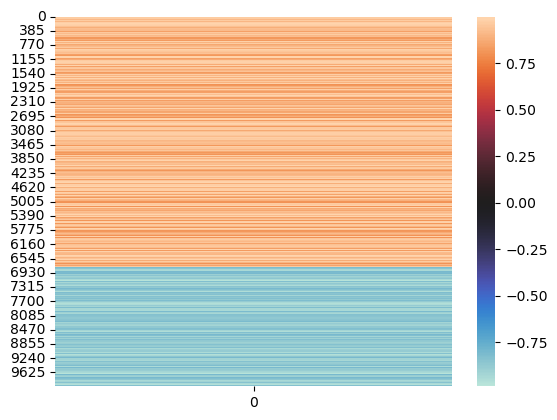

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 1128
Task 0 hypothetical scores:


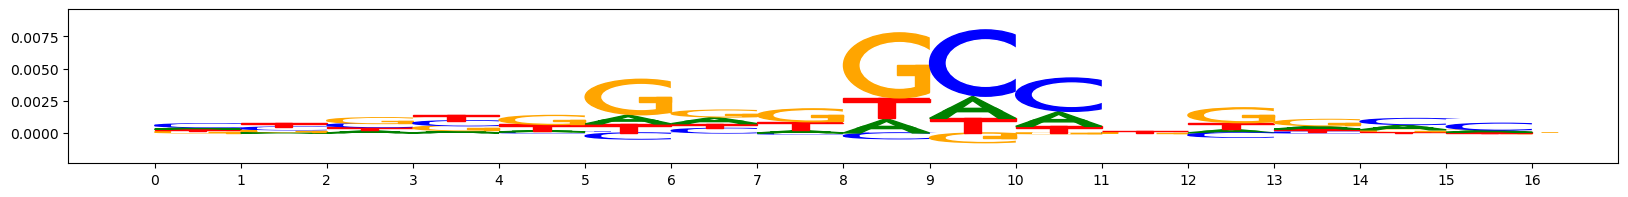

Task 0 actual importance scores:


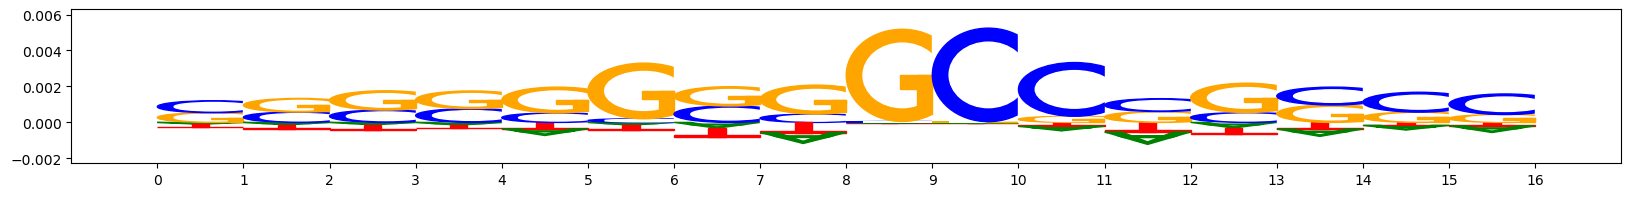

onehot:


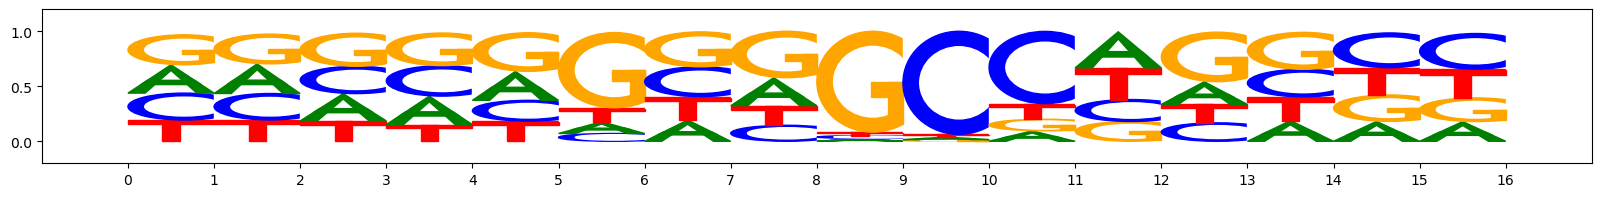

metacluster_0 pattern_1
total seqlets: 760
Task 0 hypothetical scores:


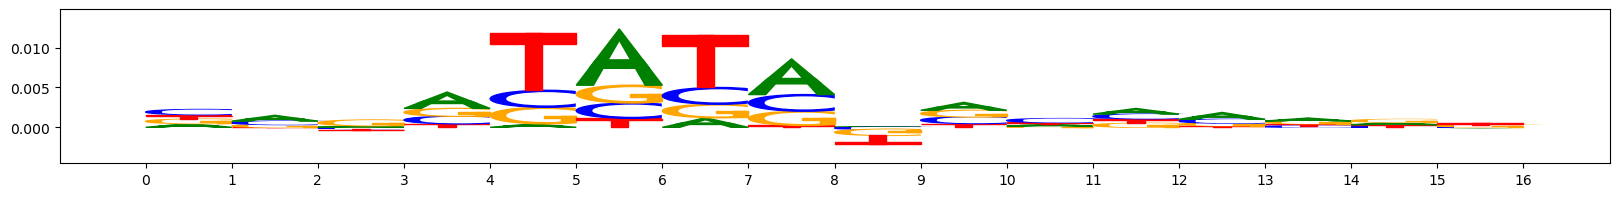

Task 0 actual importance scores:


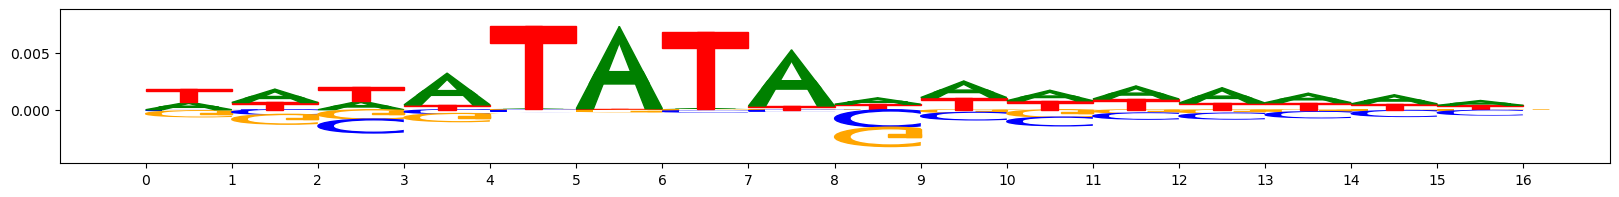

onehot:


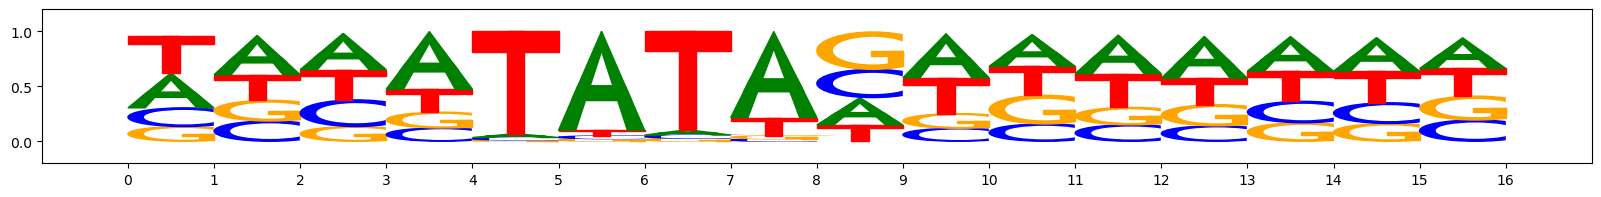

metacluster_0 pattern_2
total seqlets: 371
Task 0 hypothetical scores:


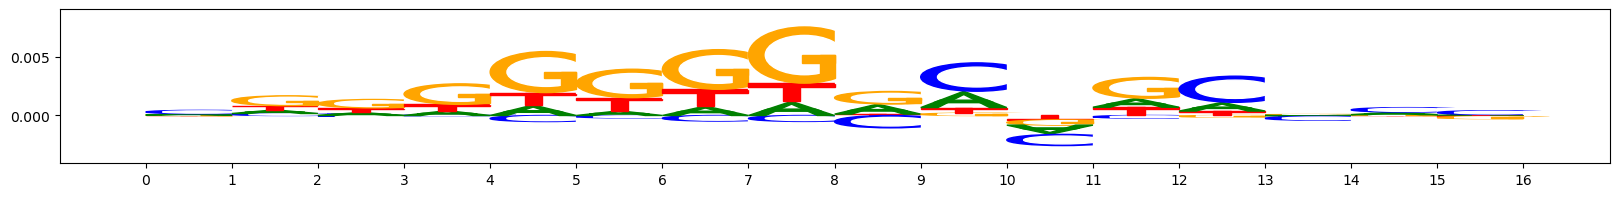

Task 0 actual importance scores:


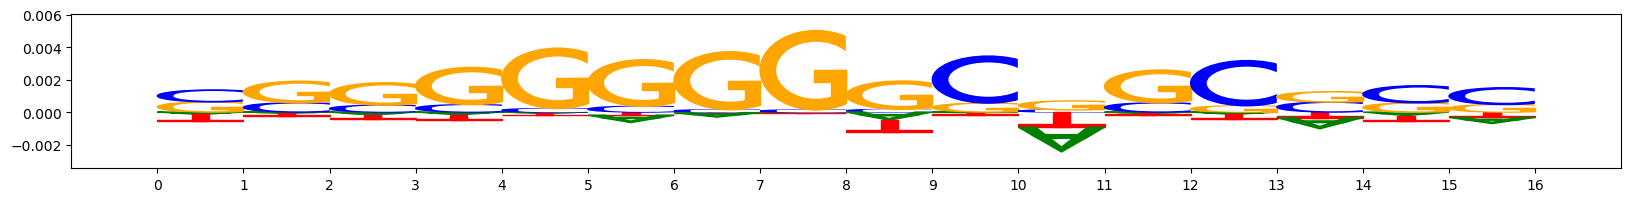

onehot:


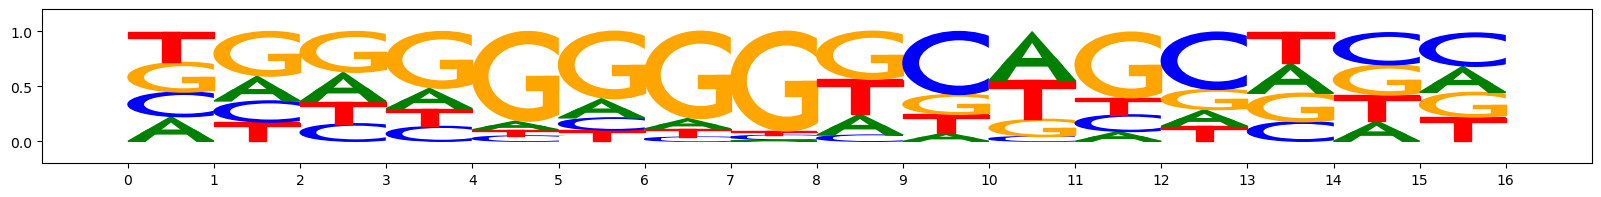

metacluster_0 pattern_3
total seqlets: 335
Task 0 hypothetical scores:


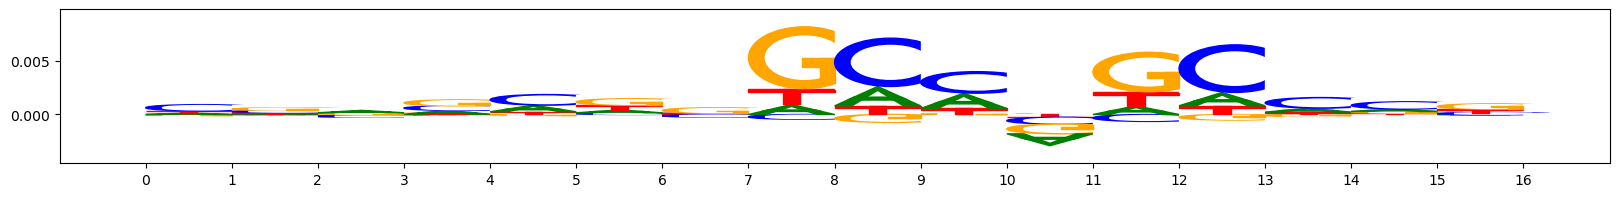

Task 0 actual importance scores:


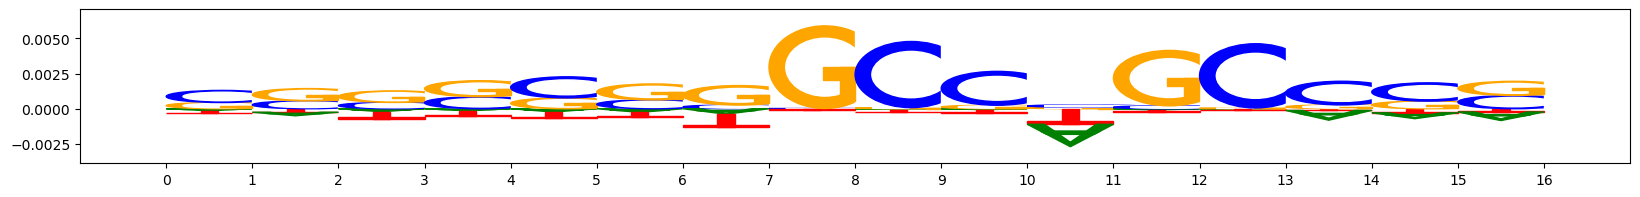

onehot:


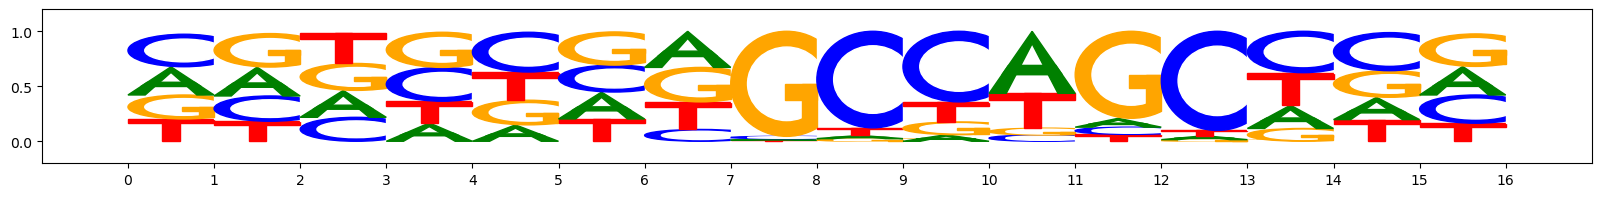

metacluster_0 pattern_4
total seqlets: 303
Task 0 hypothetical scores:


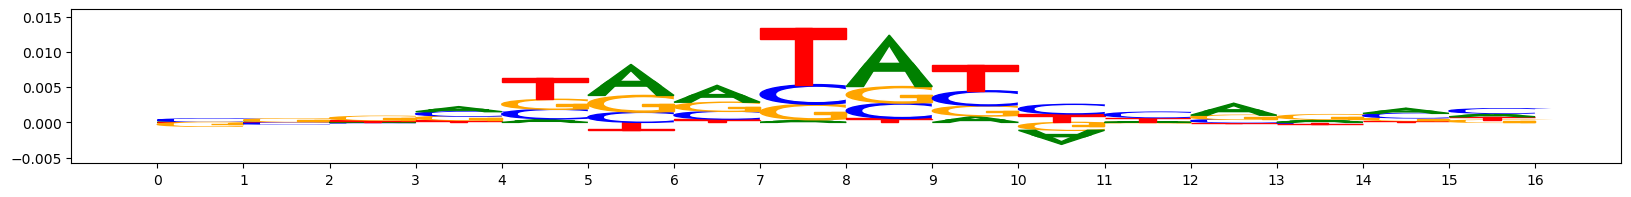

Task 0 actual importance scores:


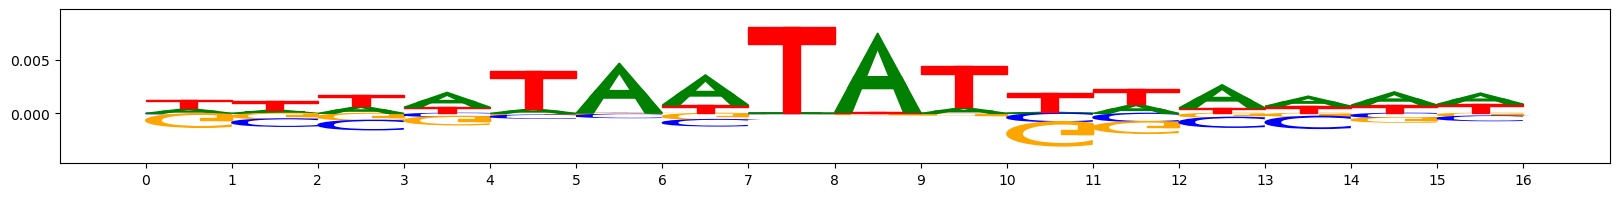

onehot:


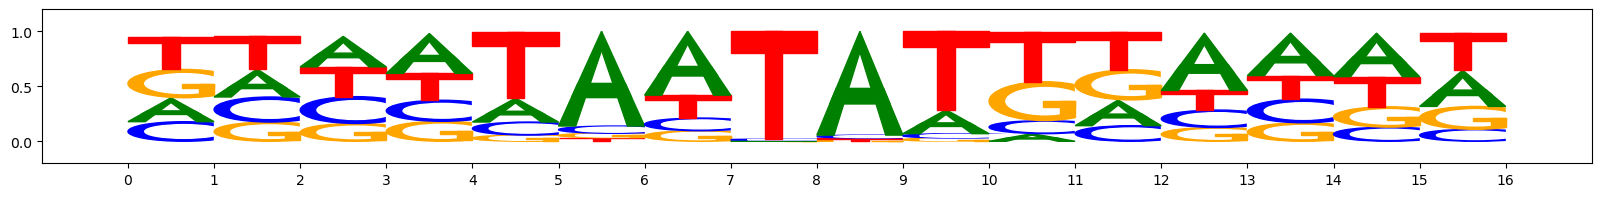

metacluster_0 pattern_5
total seqlets: 294
Task 0 hypothetical scores:


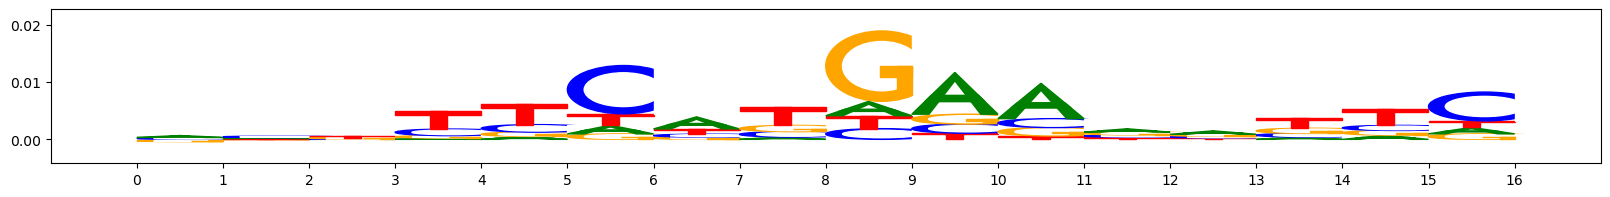

Task 0 actual importance scores:


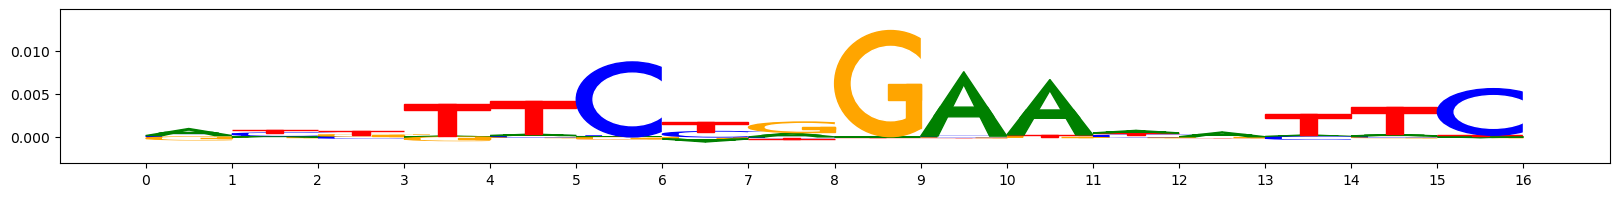

onehot:


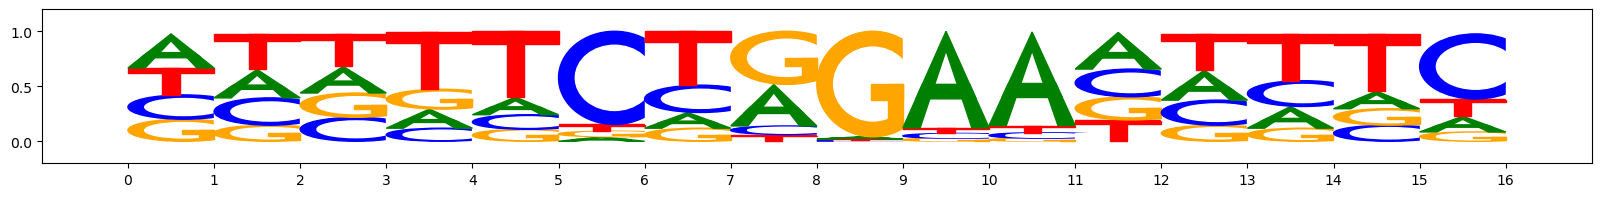

metacluster_0 pattern_6
total seqlets: 282
Task 0 hypothetical scores:


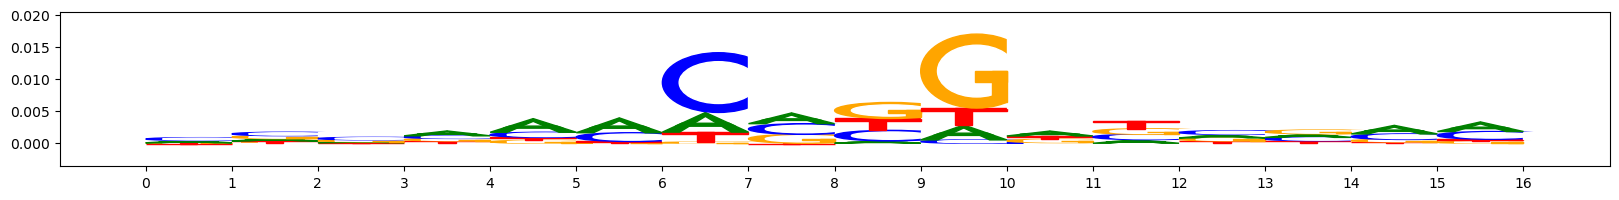

Task 0 actual importance scores:


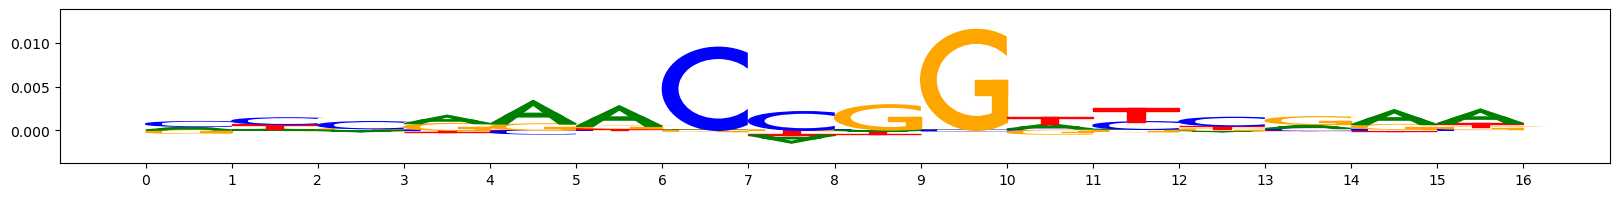

onehot:


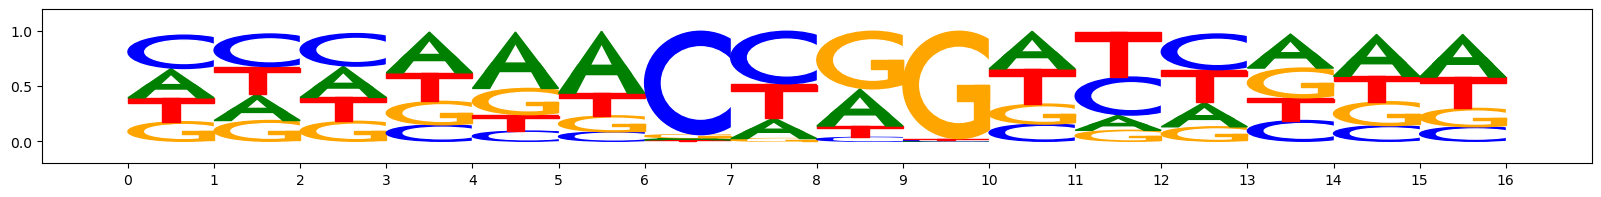

metacluster_0 pattern_7
total seqlets: 264
Task 0 hypothetical scores:


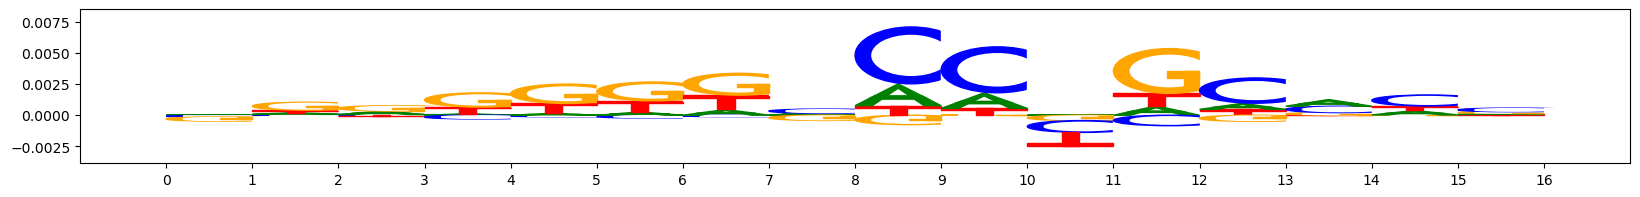

Task 0 actual importance scores:


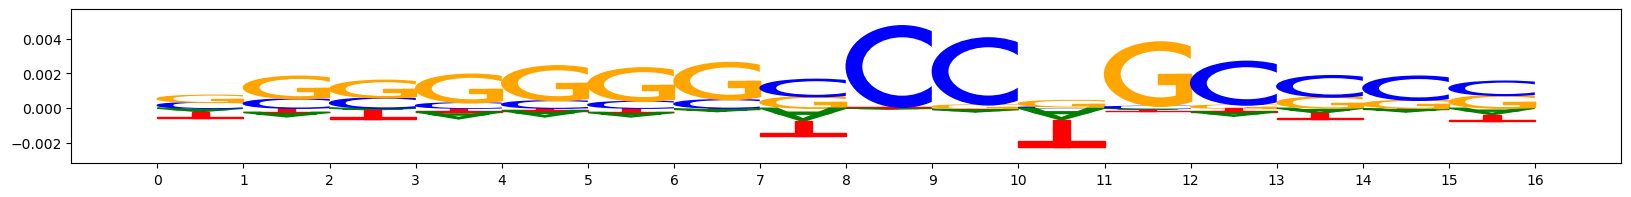

onehot:


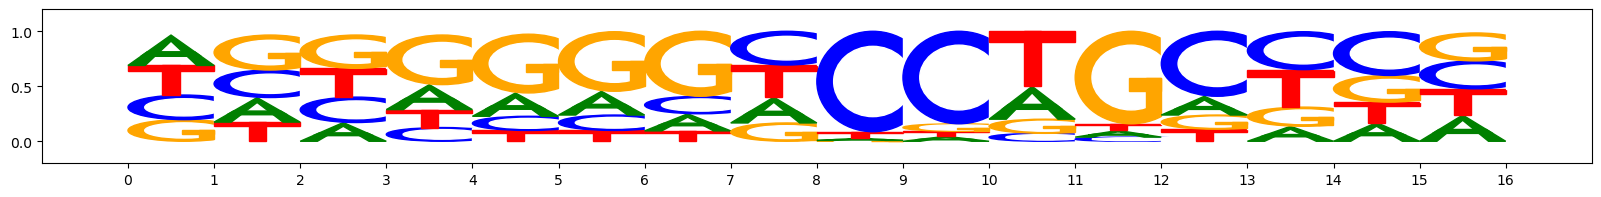

metacluster_0 pattern_8
total seqlets: 240
Task 0 hypothetical scores:


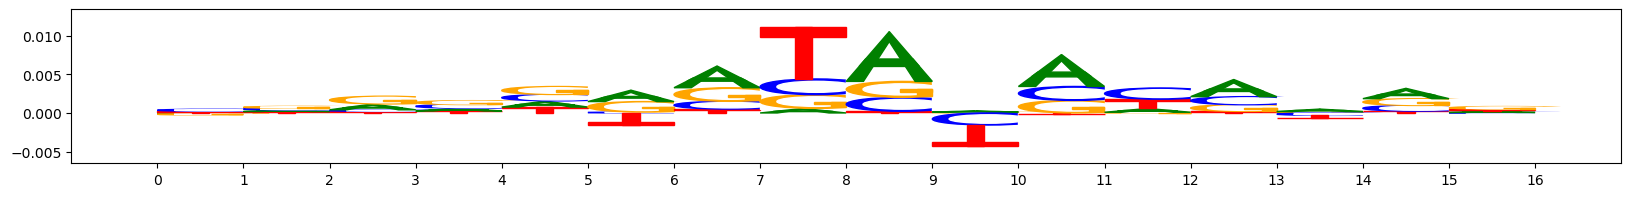

Task 0 actual importance scores:


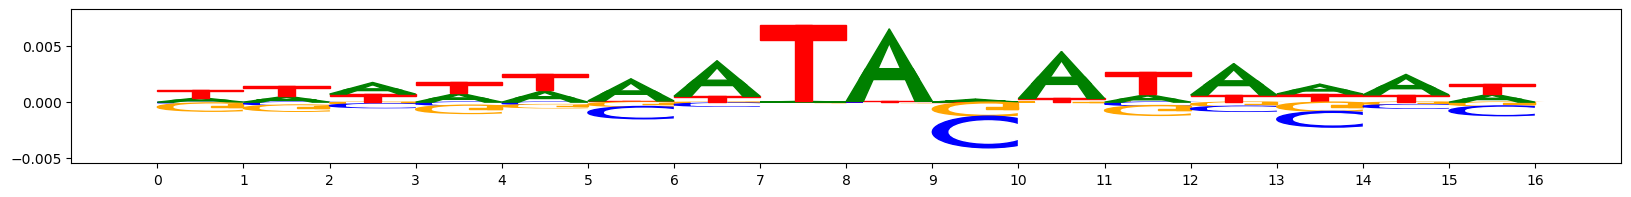

onehot:


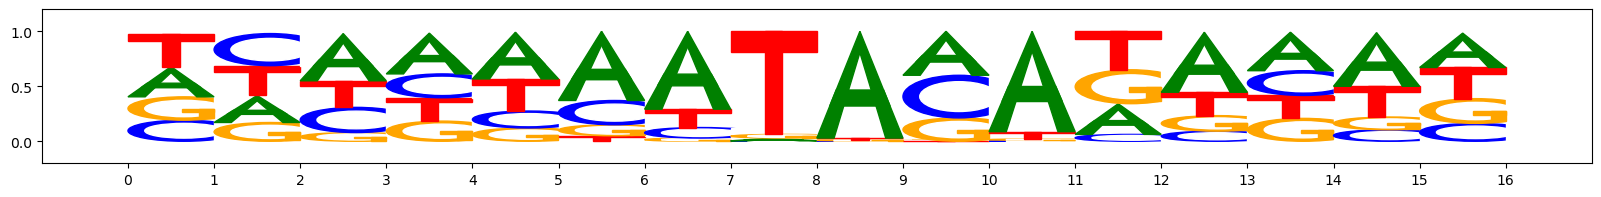

metacluster_0 pattern_9
total seqlets: 178
Task 0 hypothetical scores:


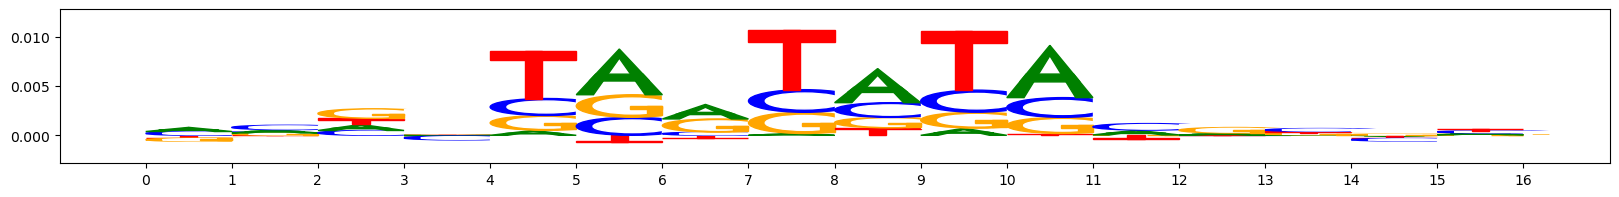

Task 0 actual importance scores:


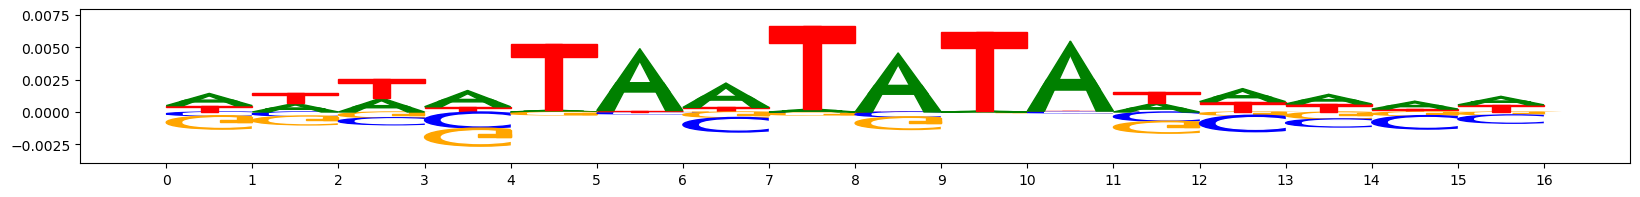

onehot:


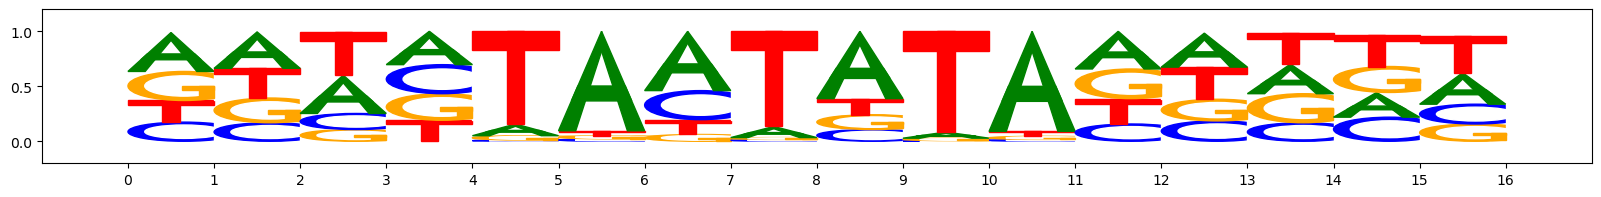

metacluster_0 pattern_10
total seqlets: 169
Task 0 hypothetical scores:


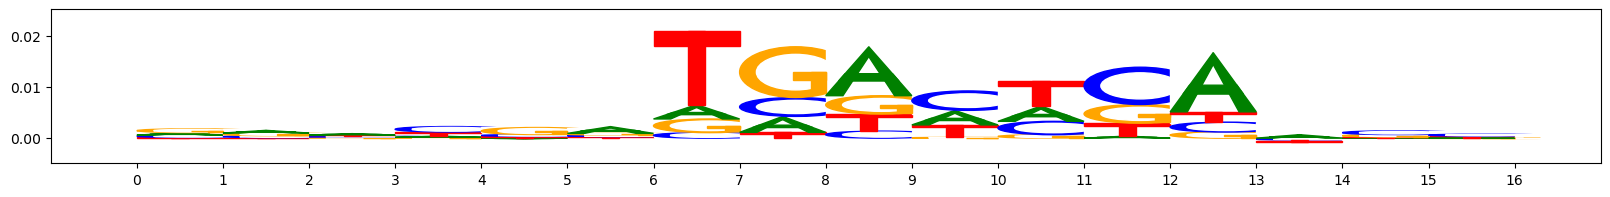

Task 0 actual importance scores:


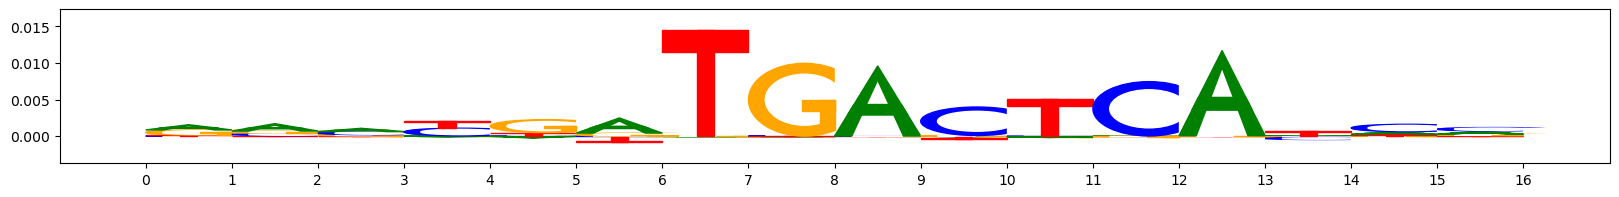

onehot:


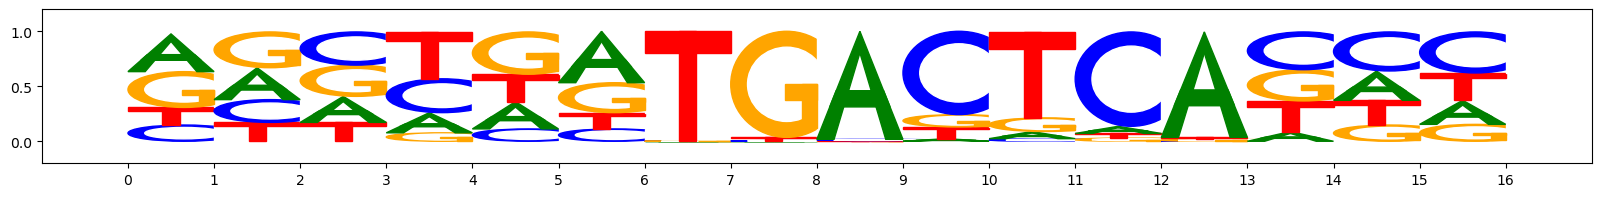

metacluster_0 pattern_11
total seqlets: 82
Task 0 hypothetical scores:


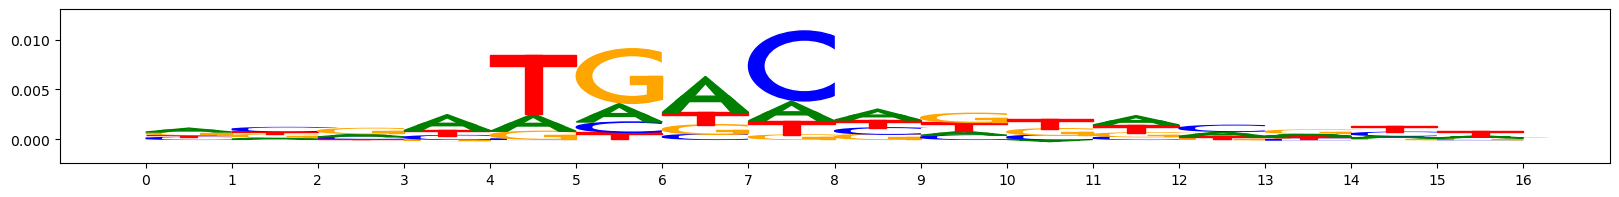

Task 0 actual importance scores:


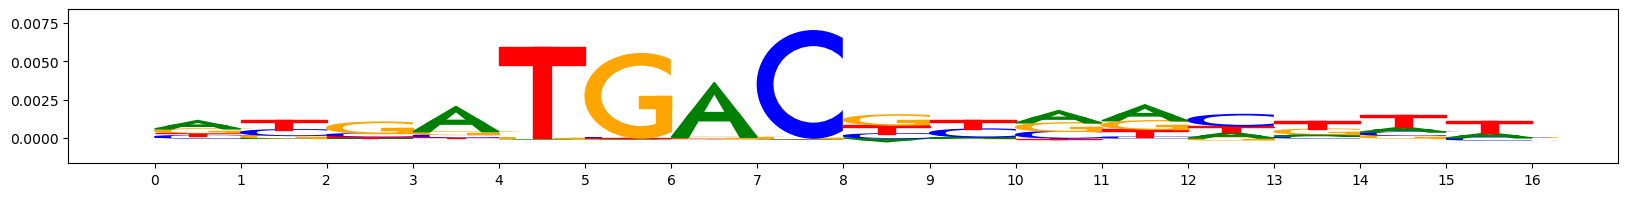

onehot:


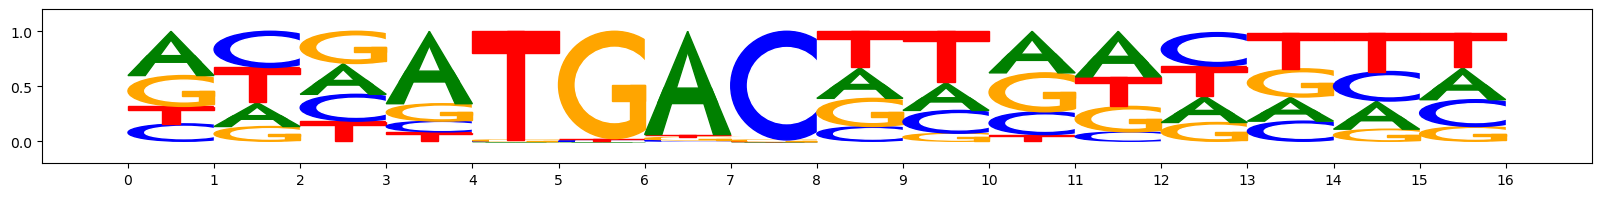

metacluster_0 pattern_12
total seqlets: 56
Task 0 hypothetical scores:


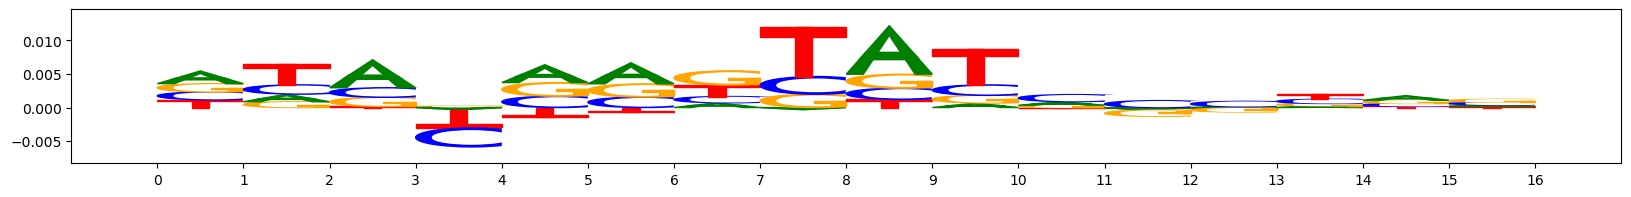

Task 0 actual importance scores:


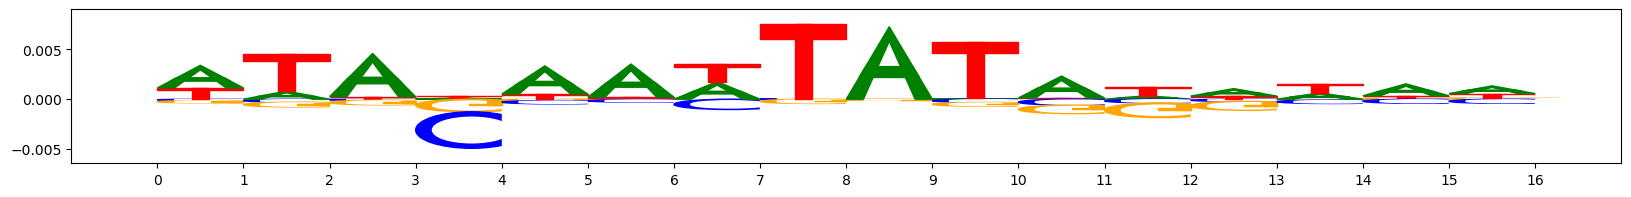

onehot:


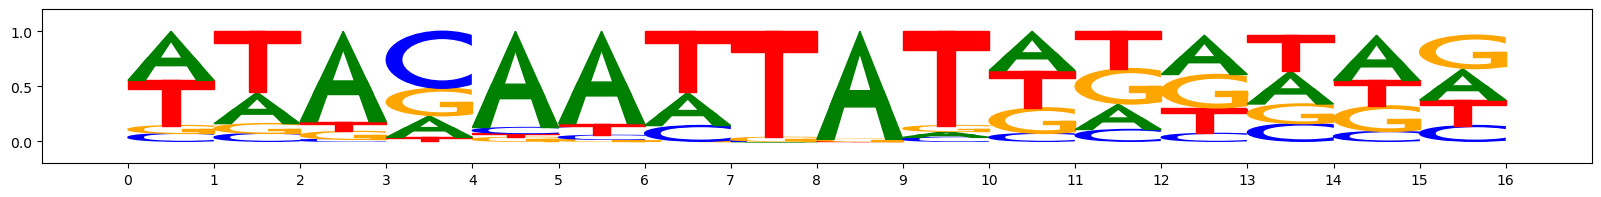

metacluster_0 pattern_13
total seqlets: 52
Task 0 hypothetical scores:


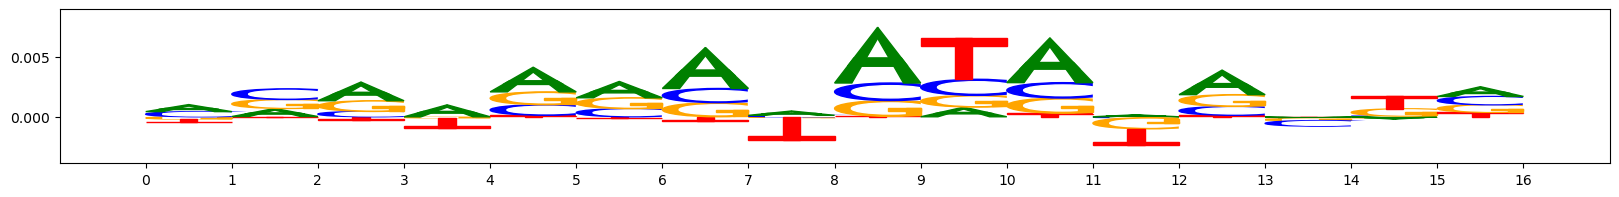

Task 0 actual importance scores:


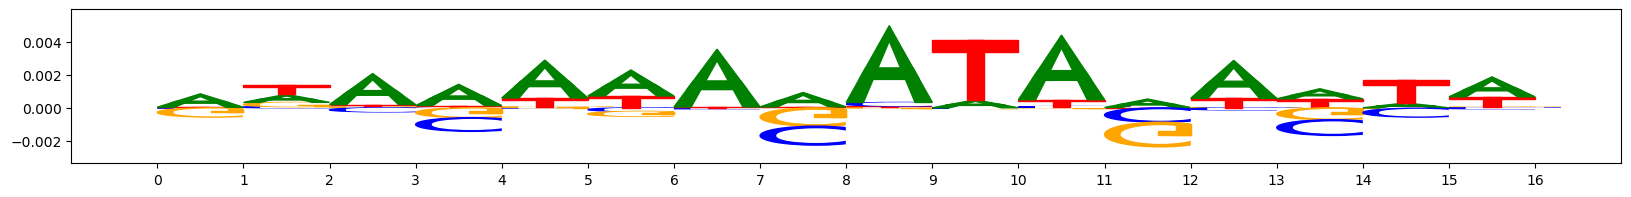

onehot:


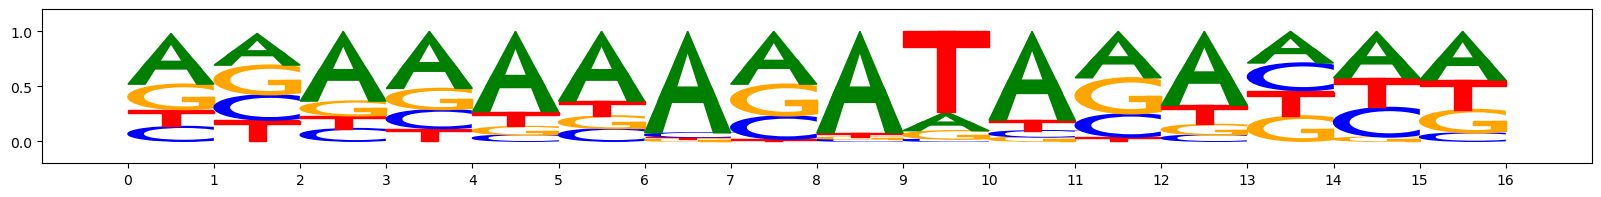

metacluster_0 pattern_14
total seqlets: 43
Task 0 hypothetical scores:


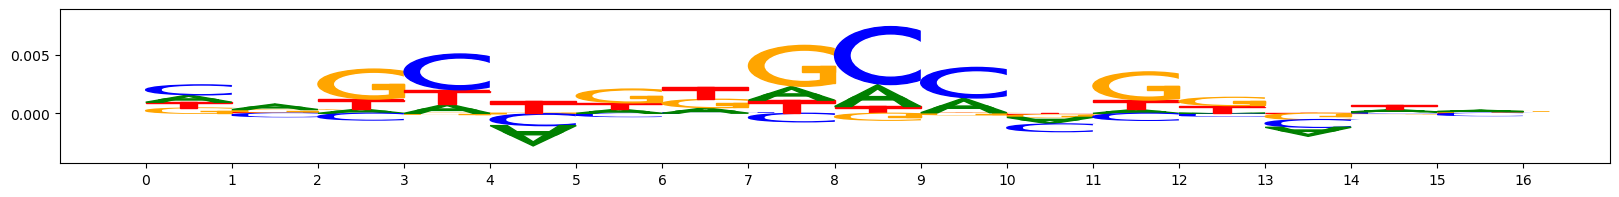

Task 0 actual importance scores:


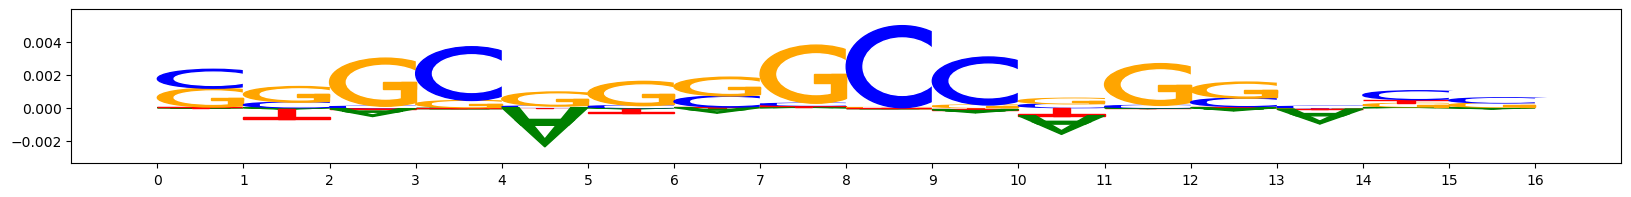

onehot:


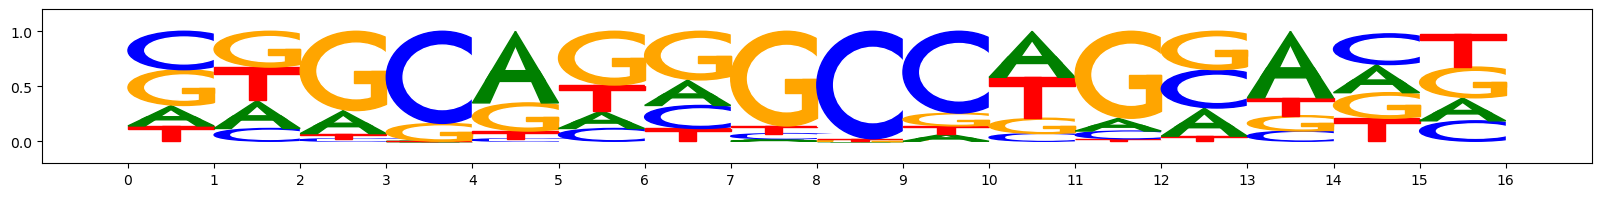

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 157
Task 0 hypothetical scores:


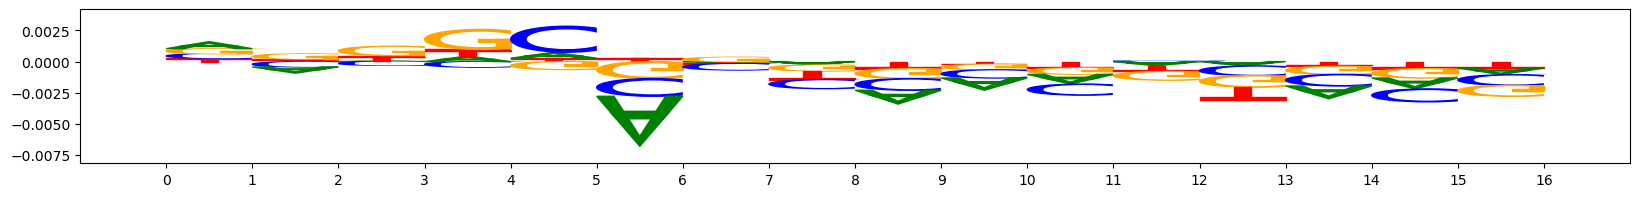

Task 0 actual importance scores:


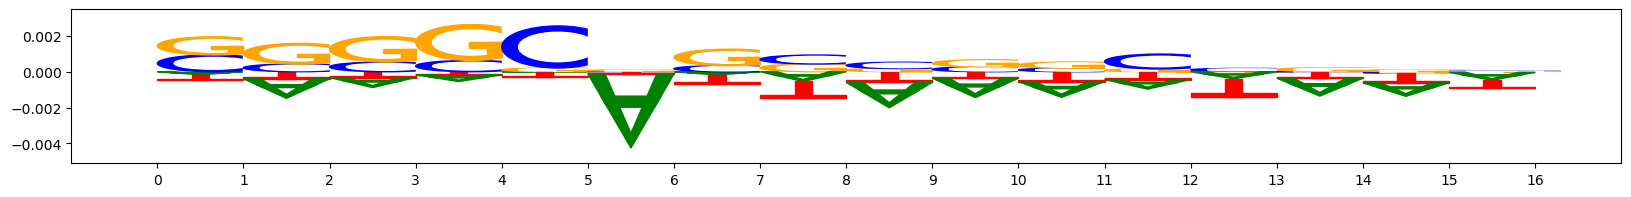

onehot:


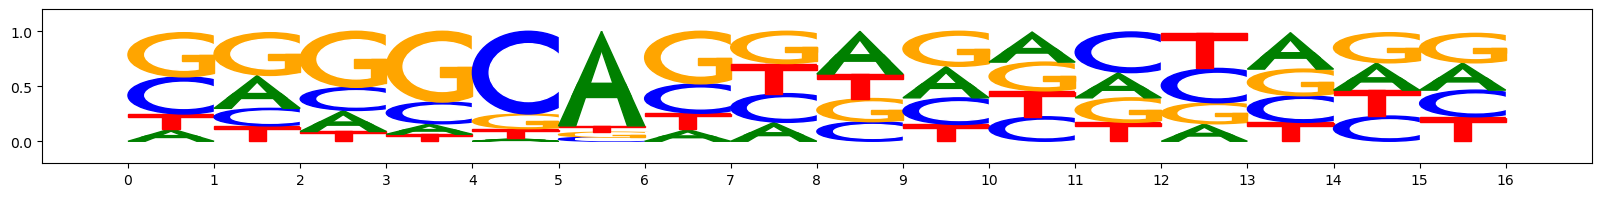

metacluster_1 pattern_1
total seqlets: 147
Task 0 hypothetical scores:


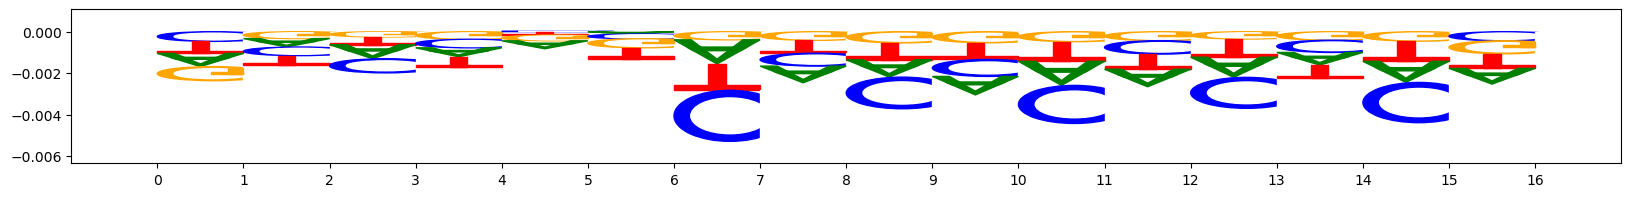

Task 0 actual importance scores:


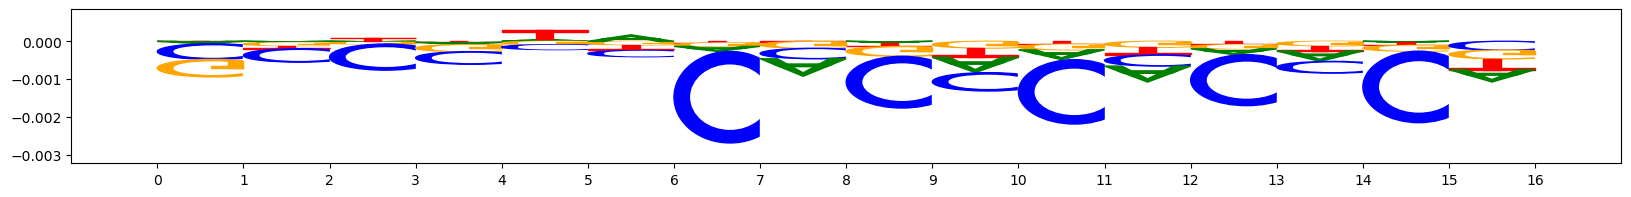

onehot:


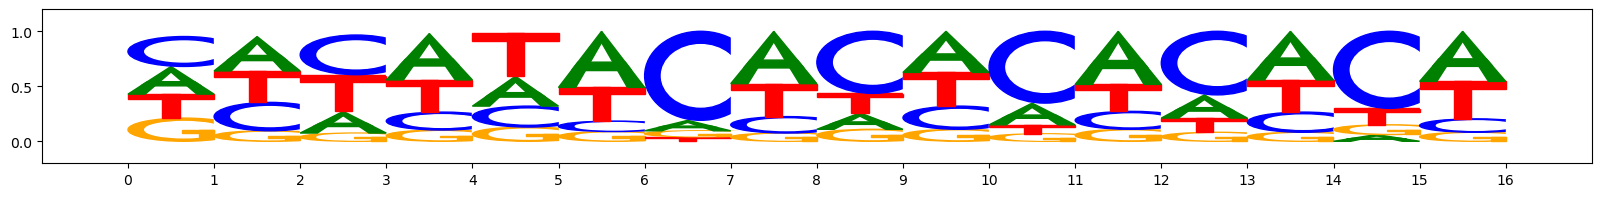

metacluster_1 pattern_2
total seqlets: 125
Task 0 hypothetical scores:


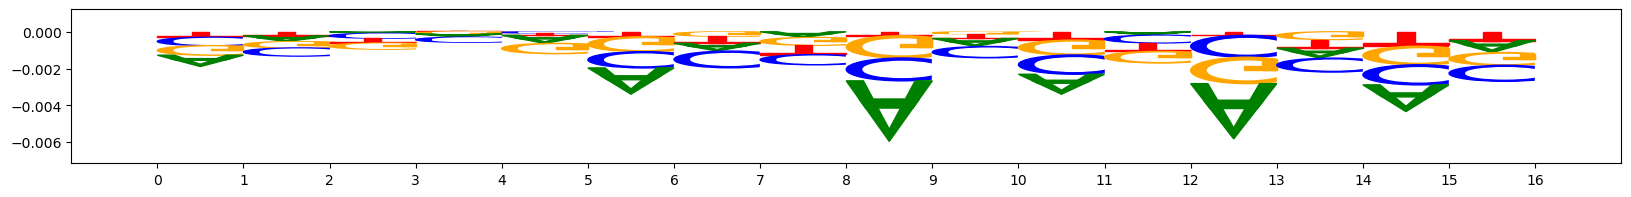

Task 0 actual importance scores:


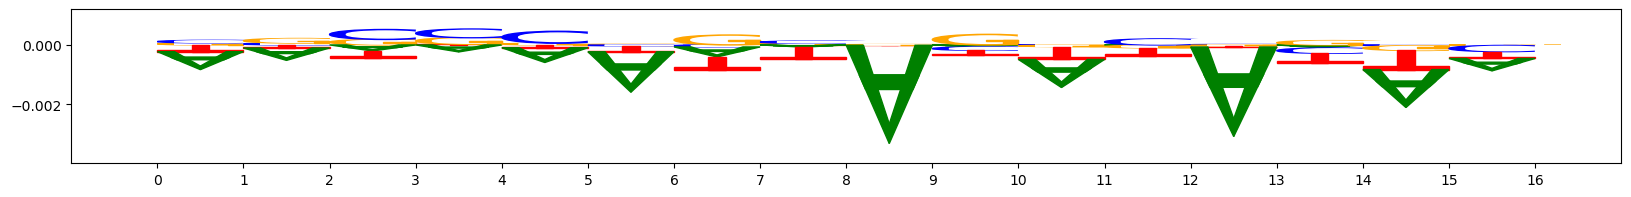

onehot:


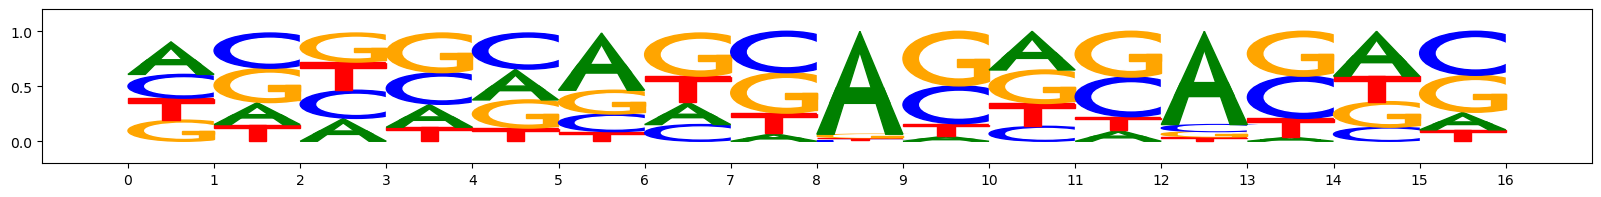

metacluster_1 pattern_3
total seqlets: 113
Task 0 hypothetical scores:


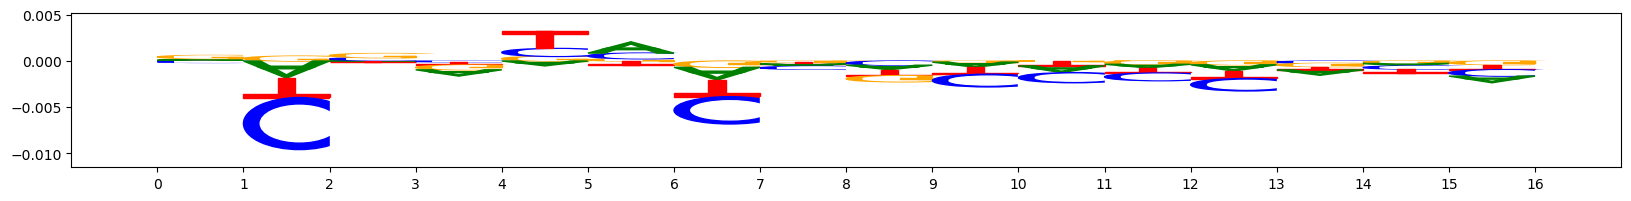

Task 0 actual importance scores:


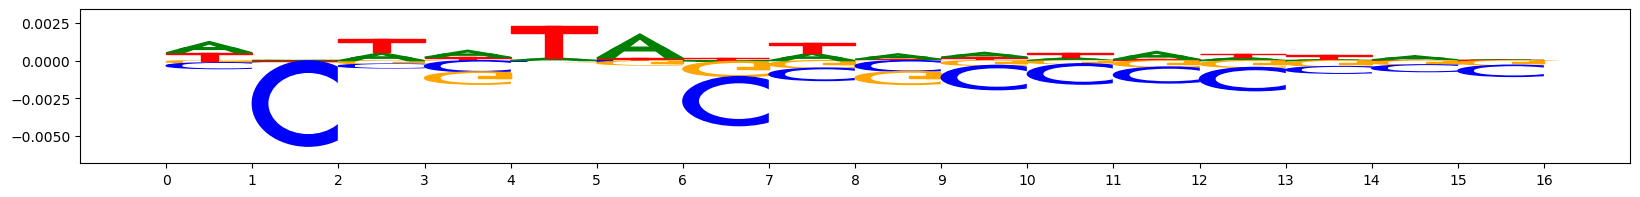

onehot:


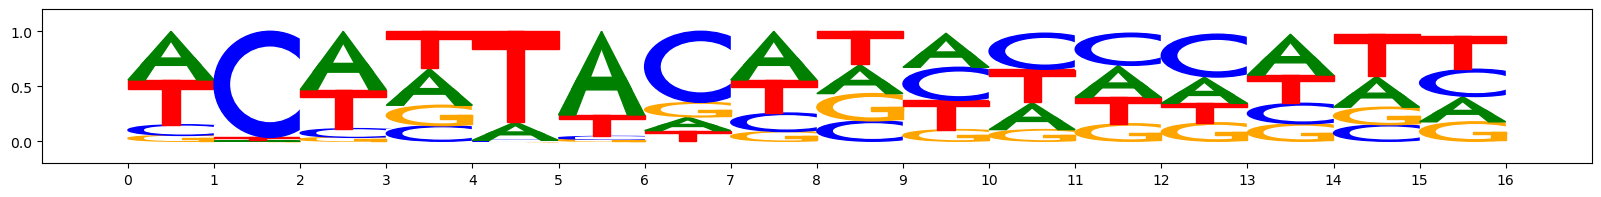

metacluster_1 pattern_4
total seqlets: 113
Task 0 hypothetical scores:


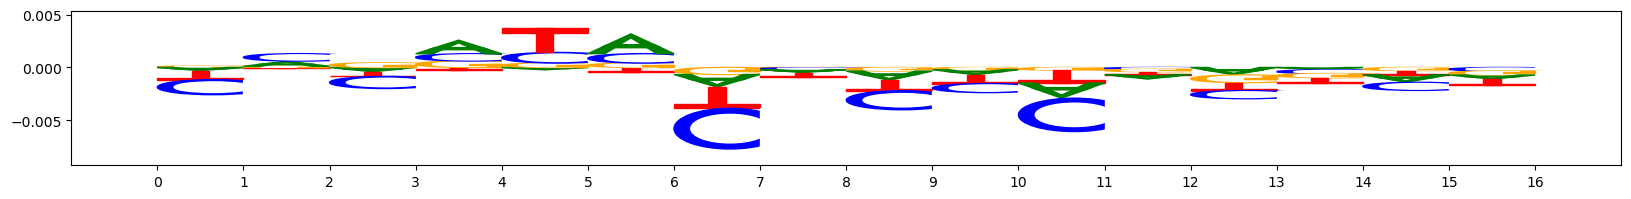

Task 0 actual importance scores:


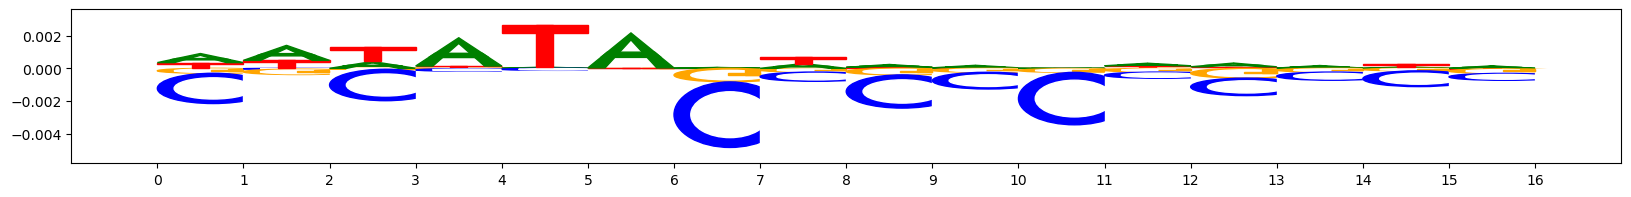

onehot:


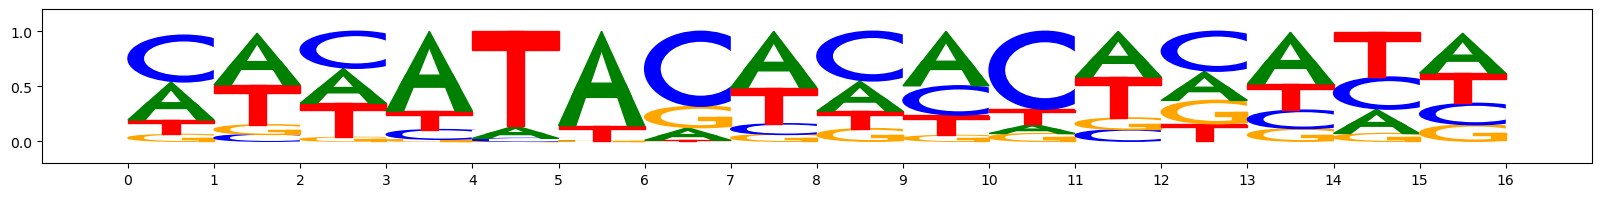

metacluster_1 pattern_5
total seqlets: 107
Task 0 hypothetical scores:


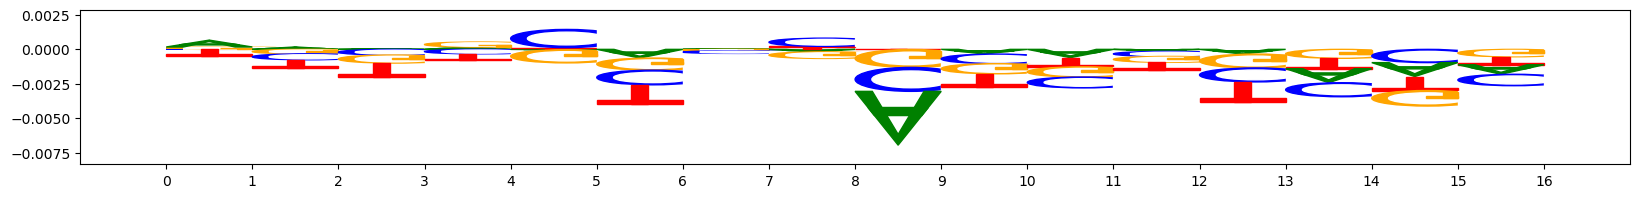

Task 0 actual importance scores:


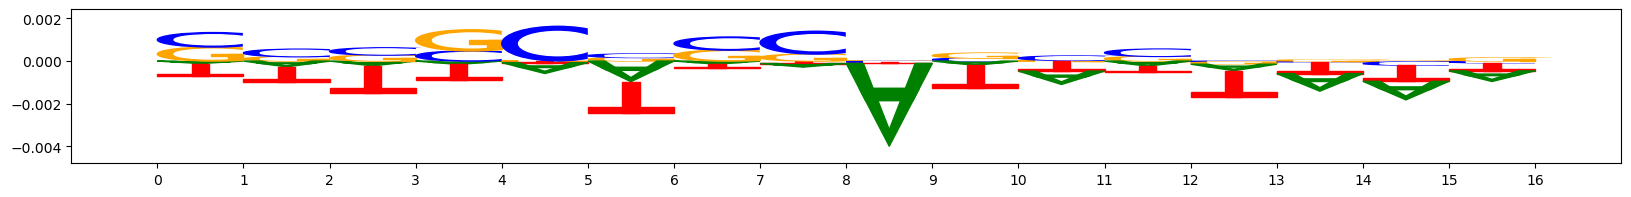

onehot:


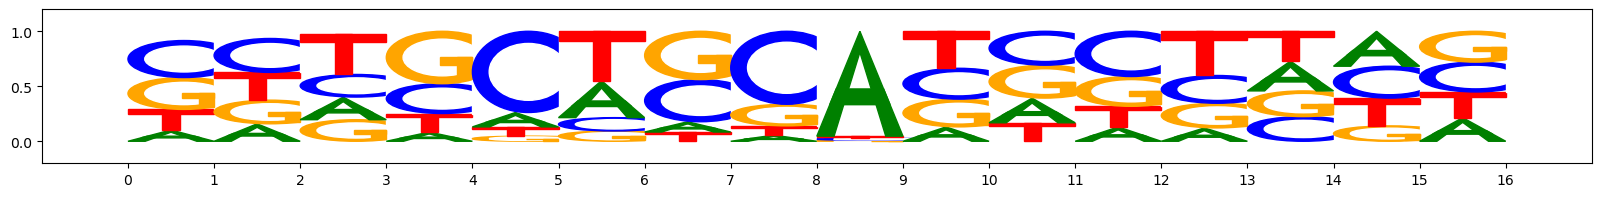

metacluster_1 pattern_6
total seqlets: 90
Task 0 hypothetical scores:


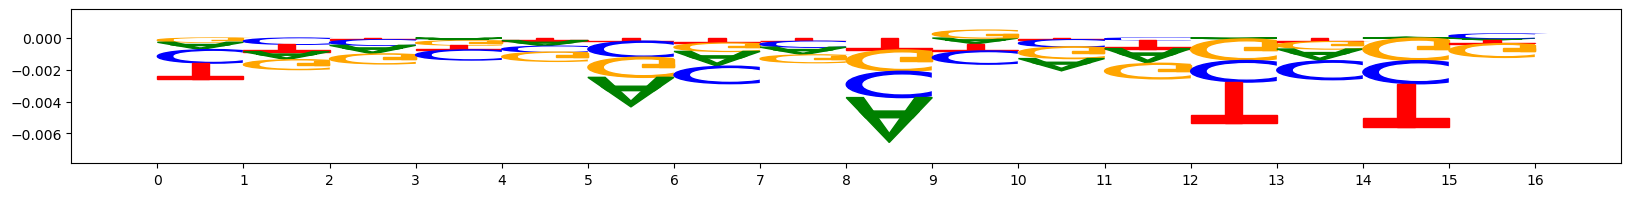

Task 0 actual importance scores:


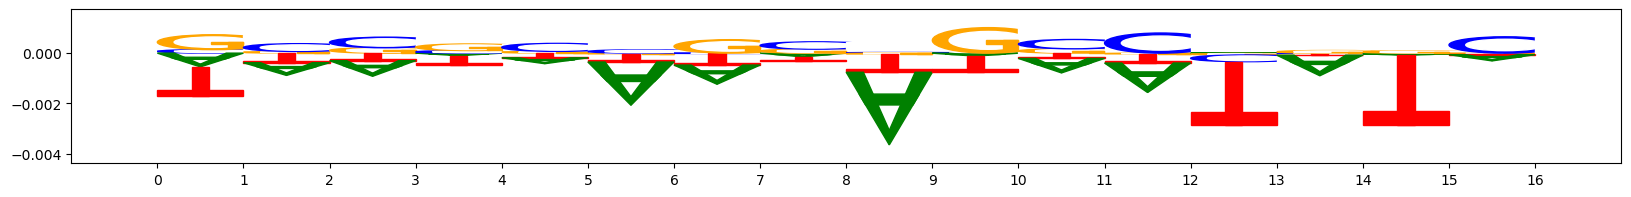

onehot:


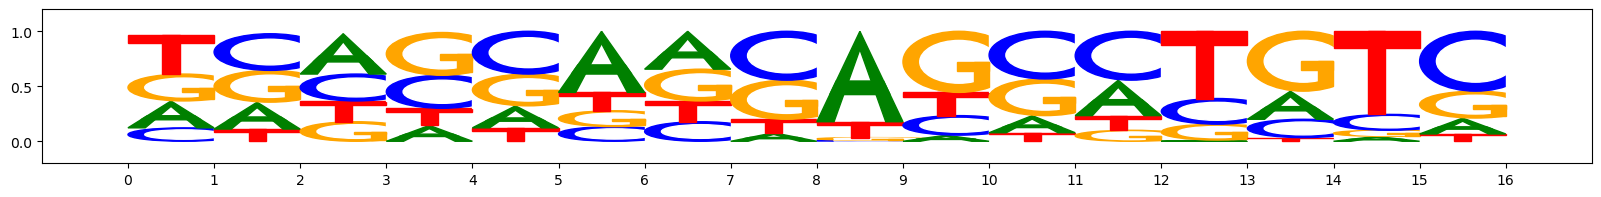

metacluster_1 pattern_7
total seqlets: 86
Task 0 hypothetical scores:


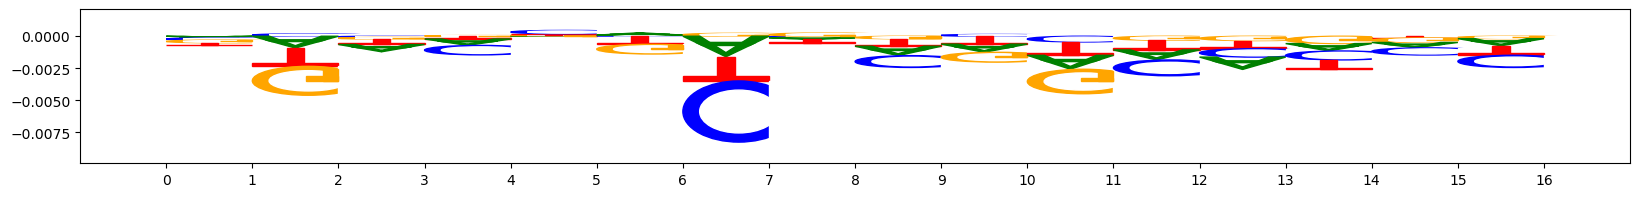

Task 0 actual importance scores:


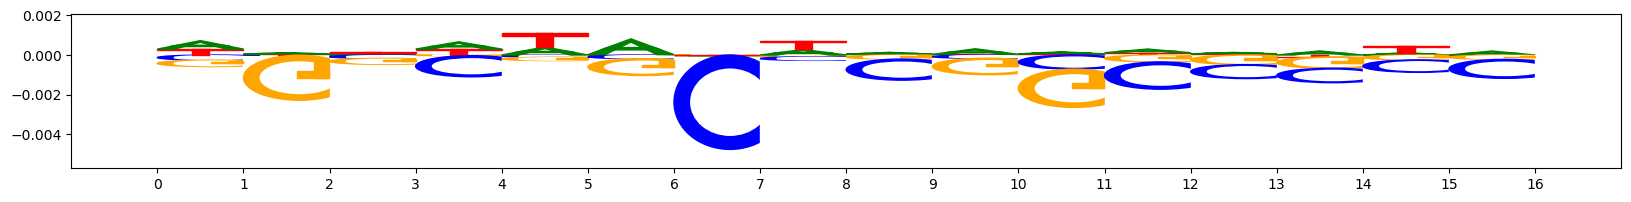

onehot:


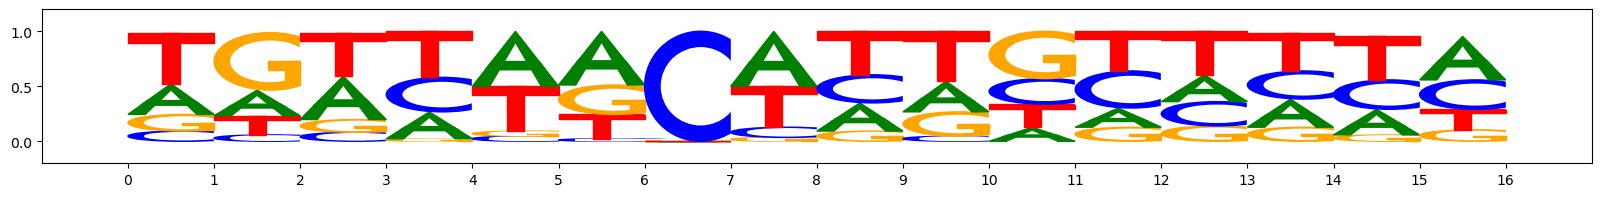

metacluster_1 pattern_8
total seqlets: 80
Task 0 hypothetical scores:


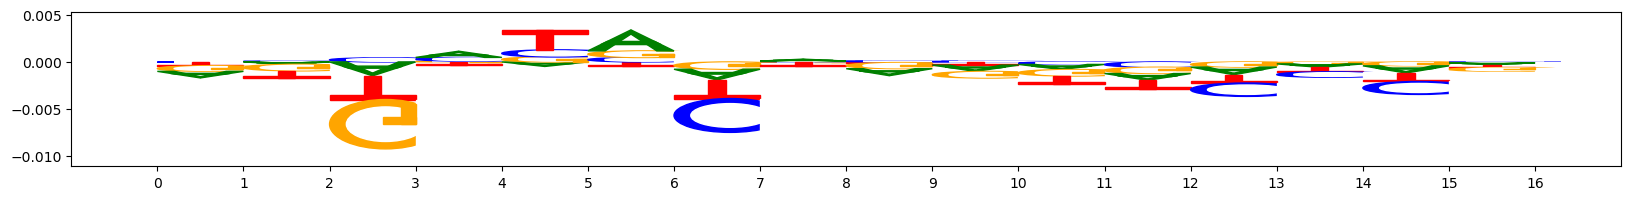

Task 0 actual importance scores:


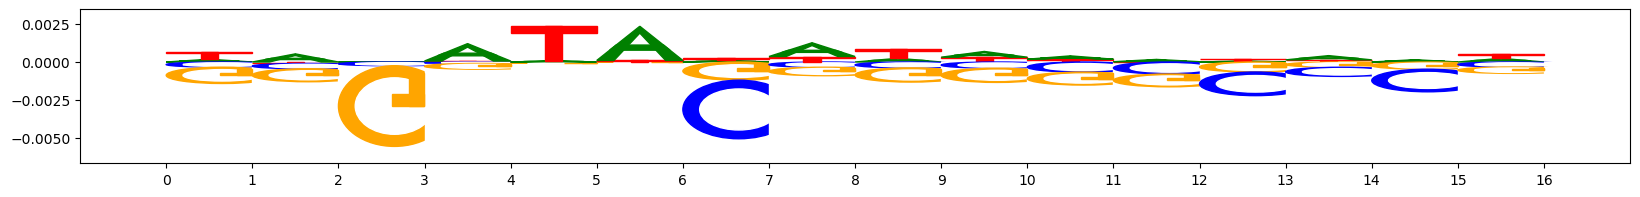

onehot:


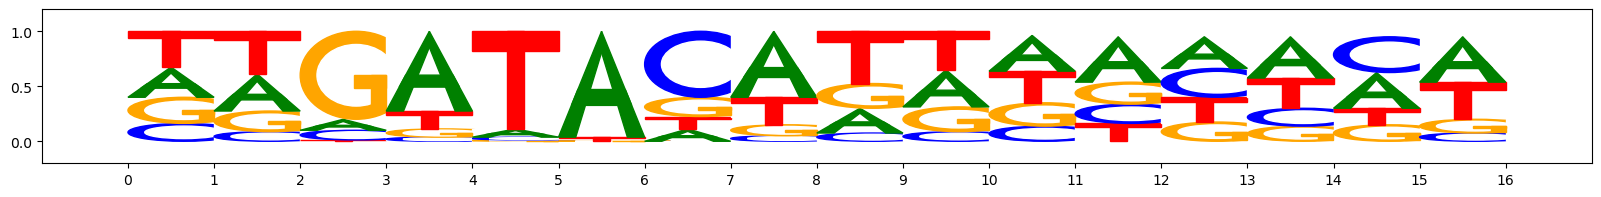

metacluster_1 pattern_9
total seqlets: 78
Task 0 hypothetical scores:


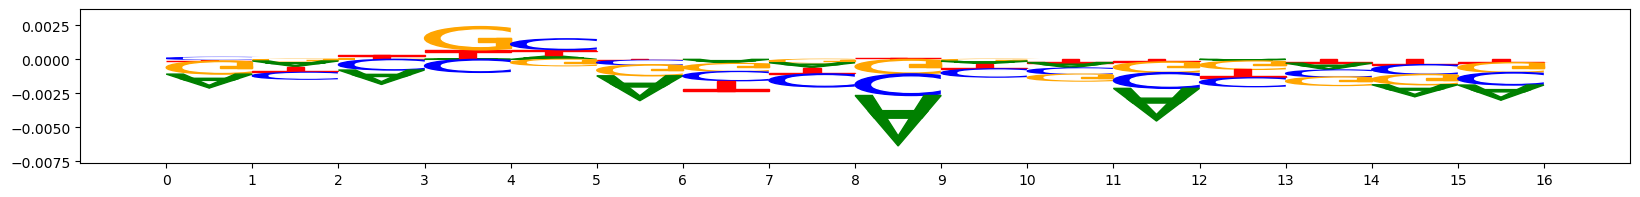

Task 0 actual importance scores:


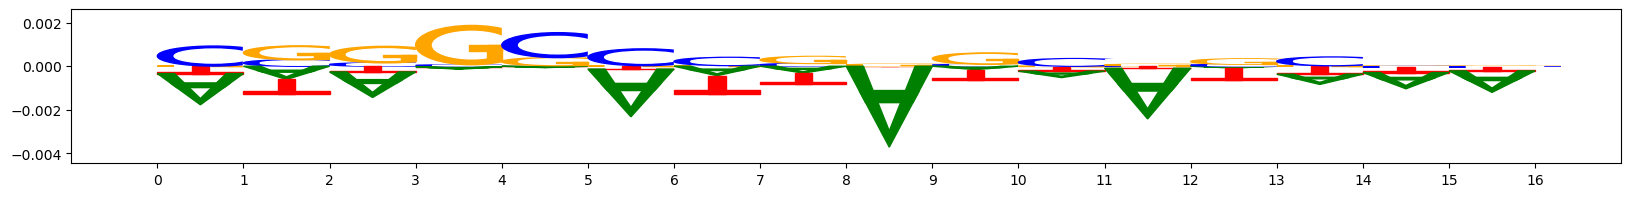

onehot:


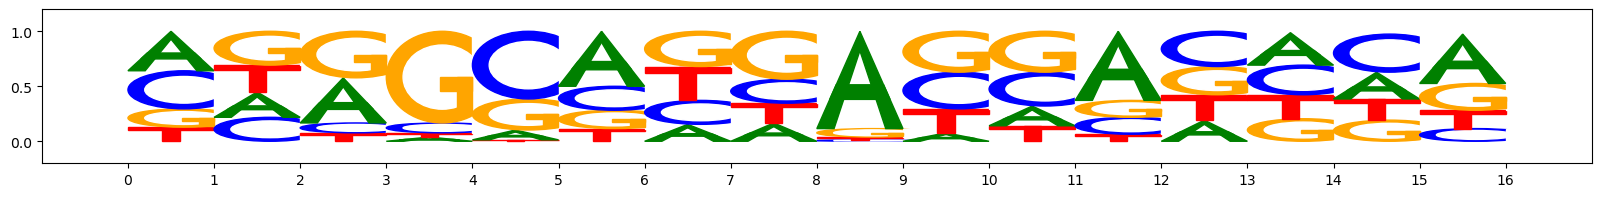

metacluster_1 pattern_10
total seqlets: 78
Task 0 hypothetical scores:


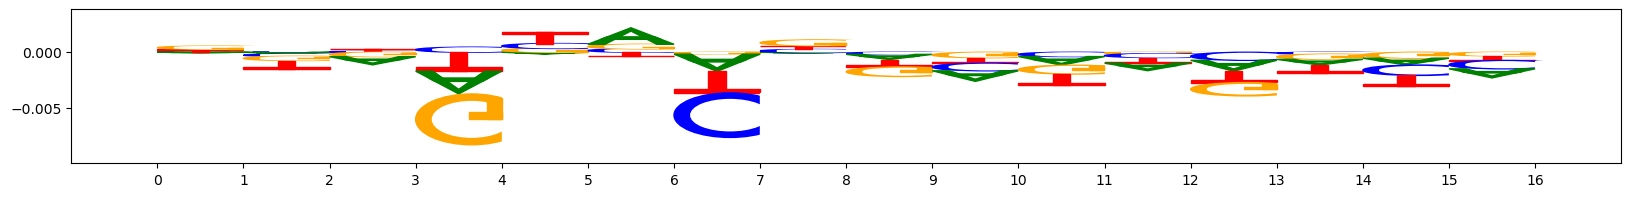

Task 0 actual importance scores:


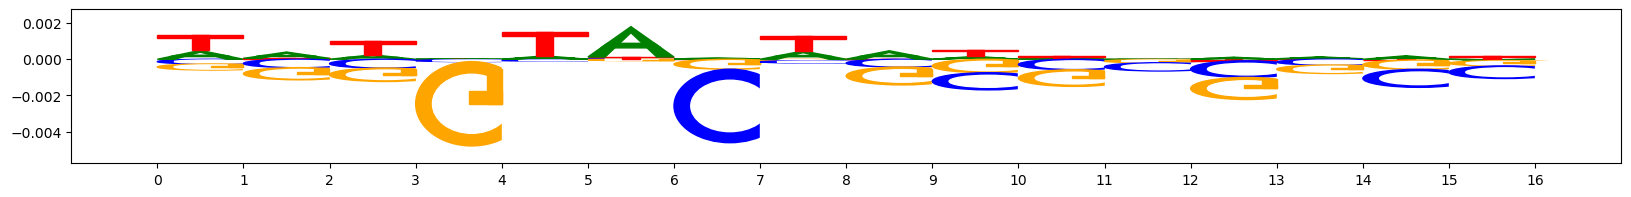

onehot:


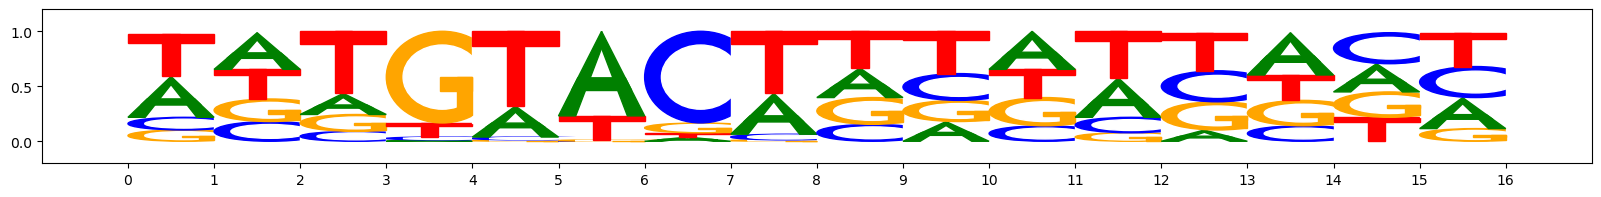

metacluster_1 pattern_11
total seqlets: 68
Task 0 hypothetical scores:


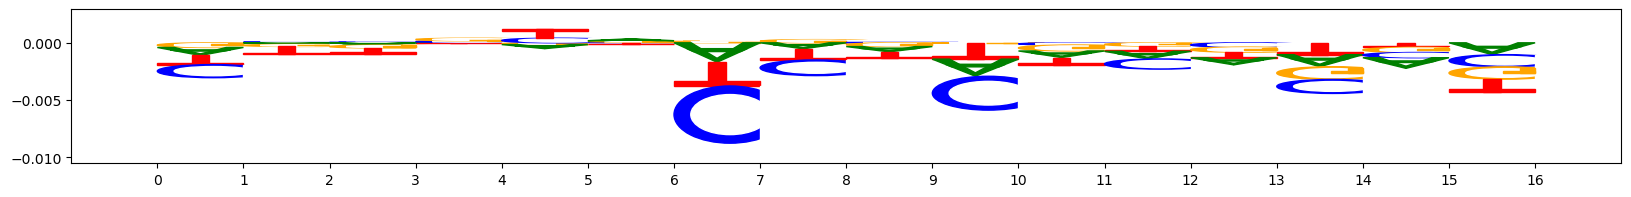

Task 0 actual importance scores:


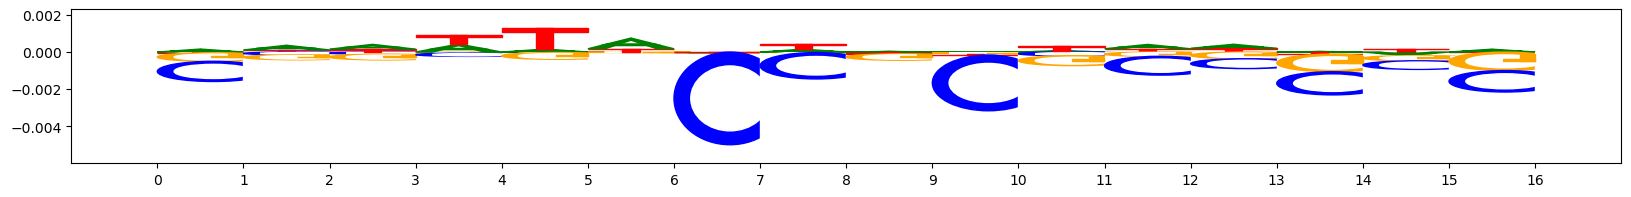

onehot:


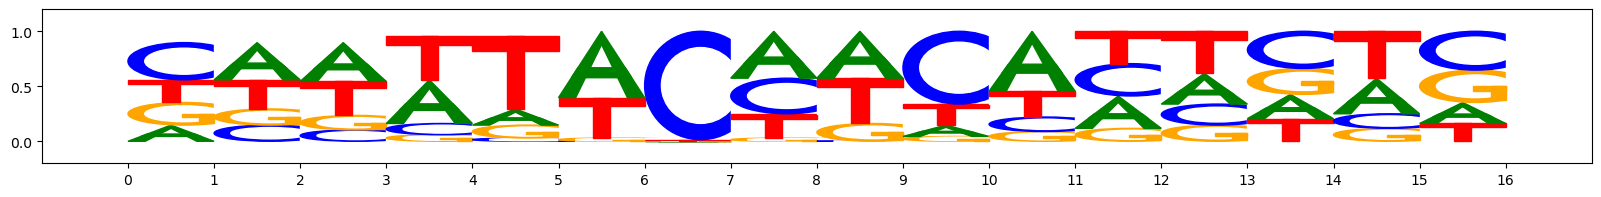

metacluster_1 pattern_12
total seqlets: 61
Task 0 hypothetical scores:


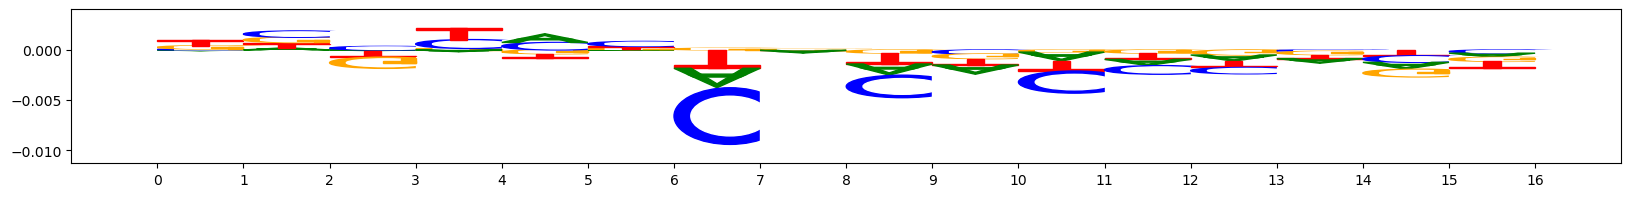

Task 0 actual importance scores:


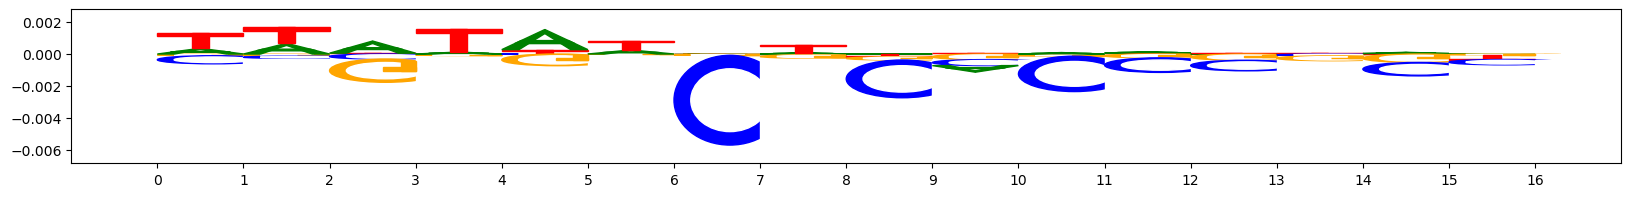

onehot:


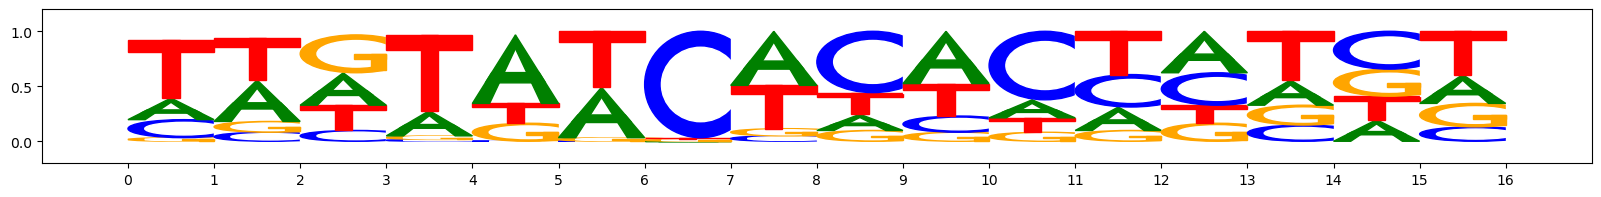

metacluster_1 pattern_13
total seqlets: 53
Task 0 hypothetical scores:


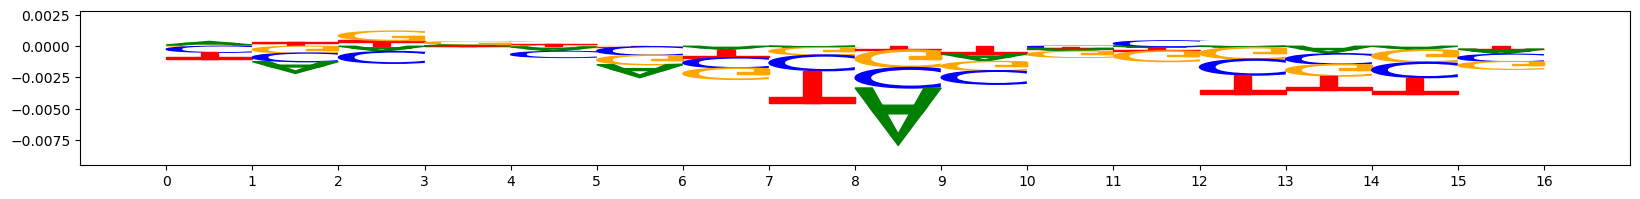

Task 0 actual importance scores:


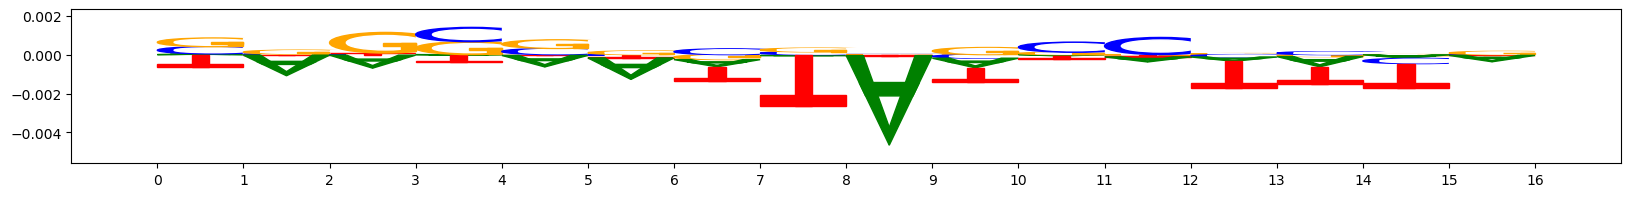

onehot:


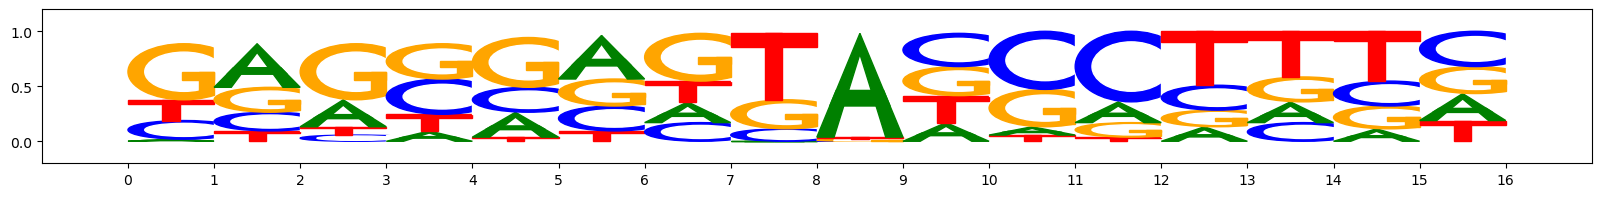

In [88]:
from collections import Counter
import numpy as np

from modisco.visualization import viz_sequence
from matplotlib import pyplot as plt

import modisco.affinitymat.core
import modisco.cluster.phenograph.core
import modisco.cluster.phenograph.cluster
import modisco.cluster.core
import modisco.aggregator

hdf5_results = h5py.File("results.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.mean(onehot, axis=(0,1))

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        #print("Task 1 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"]["fwd"])
        #print("Task 1 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        #print("Task 2 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"]["fwd"])
        #print("Task 2 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        #print("onehot, fwd and rev:")
        print("onehot:")
        viz_sequence.plot_weights(pattern["sequence"]["fwd"])
        #viz_sequence.plot_weights(pattern["sequence"]["rev"])
        #viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
        #                                                background=background)) 
        #viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
        #                                                background=background)) 
        """ #Plot the subclustering too, if available
        if ("subclusters" in pattern):
            print("PLOTTING SUBCLUSTERS")
            subclusters = np.array(pattern["subclusters"])
            twod_embedding = np.array(pattern["twod_embedding"])
            plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=subclusters, cmap="tab20")
            plt.show()
            for subcluster_name in list(pattern["subcluster_to_subpattern"]["subcluster_names"]):
                subpattern = pattern["subcluster_to_subpattern"][subcluster_name]
                print(subcluster_name.decode("utf-8"), "size", len(subpattern["seqlets_and_alnmts"]["seqlets"]))
                subcluster = int(subcluster_name.decode("utf-8").split("_")[1])
                plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=(subclusters==subcluster))
                plt.show()
                viz_sequence.plot_weights(subpattern["task0_hypothetical_contribs"]["fwd"])
                viz_sequence.plot_weights(subpattern["task0_contrib_scores"]["fwd"])
                viz_sequence.plot_weights(subpattern["sequence"]["fwd"])"""
        
hdf5_results.close()

### Create motifs

In [11]:
hdf5_results = h5py.File("results.hdf5","r")

motifs = []
nseqlets = []

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

for metacluster_name in metacluster_names:
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    for pattern_name in all_pattern_names:
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        nseqlets.append(len(pattern["seqlets_and_alnmts"]["seqlets"]))
        motifs.append(pattern["sequence"]["fwd"])

# Save
np.save("motifs.npy", np.array(motifs))

In [12]:
# load previously saved motifs
#motifs = np.load("motifs.npy")

### Create motif file in MEME Motif Format

In [14]:
motifs_arr = np.array(motifs)
motifs_file = open("motifs.txt", "w")

# File header
motifs_file.write("""MEME version 5.5.1\n\nALPHABET= ACGT\n\nstrands: + -\n
Background letter frequencies (from uniform background):
A 0.25000 C 0.25000 G 0.25000 T 0.25000\n\n""")

# Motif dimensions
nmotifs = motifs_arr.shape[0]
motiflen = motifs_arr.shape[1]
dims = motifs_arr.shape[2]

# Write motifs to file
for m in range(nmotifs):
    # Motif ID
    motifs_file.write("MOTIF M%i O%i\n" % (m, m))
    # Motif header
    motifs_file.write("letter-probability matrix: alength= 4 w= %i nsites= %i E= 1337.0e-6\n" % (motiflen, nseqlets[m]))
    for j in range(motiflen):
        # Normalize weights
        position_weights_norm = tuple(1.0 * motifs_arr[m, j, :] / np.sum(motifs_arr[m, j, :]))
        motifs_file.write("%f %f %f %f\n" % position_weights_norm)
    # Separate motifs by blank line
    motifs_file.write("\n")
motifs_file.close()

### Tomtom results

#### Load results, JASPAR motif names, and JASPAR clusters motifs
`results.tsv` obtained from uploading motifs.txt to Tomtom and searching for matches with JASPAR.

`clusters_motif_names.tsv`: https://jaspar2022.genereg.net/static/clustering/2022/vertebrates/CORE/interactive_trees/JASPAR_2022_matrix_clustering_vertebrates_CORE_tables/clusters_motif_names.tab

`JASPAR2022_CORE_vertebrates_non-redundant_names.csv`: https://jaspar.genereg.net/download/data/2022/CORE/JASPAR2022_CORE_vertebrates_non-redundant_pfms_jaspar.txt (Only header lines) 


In [5]:
tomtom = pd.read_csv("tomtom.tsv", sep="\t")
names = pd.read_csv("JASPAR2022_CORE_vertebrates_non-redundant_names.csv", names=["Target_ID", "Name"])
clusters = pd.read_csv("clusters_motif_names.tsv", sep="\t",  header=None, names=["cluster", "motifs"])

#### Assign cluster to all motif names based on JASPAR matrix clusters

In [6]:
cluster_col = []
for rown in names.iterrows():
    name = rown[1][1]
    for rowc in clusters.iterrows():
        cluster, motifs = rowc[1]
        motifs = motifs.split(",")
        if name in motifs:
            cluster_col.append(cluster)
            break
names["cluster"] = cluster_col

#### Filter significant matches and merge with names and clusters

alpha 0.05

In [7]:
matches = tomtom.loc[np.where(tomtom['q-value'] <= 0.05)].merge(names, on="Target_ID", how="left")

In [8]:
matches.sort_values("q-value")

Query_ID Target_ID  Optimal_offset       p-value       E-value   q-value  \
9       M10  MA1137.1              -3  6.888660e-10  5.793360e-07  0.000001   
10      M10  MA1130.1              -4  6.419010e-08  5.398390e-05  0.000050   
11      M10  MA1128.1              -3  9.232100e-08  7.764190e-05  0.000050   
13      M10  MA1141.1              -3  1.868830e-07  1.571690e-04  0.000061   
12      M10  MA0491.2              -3  1.868830e-07  1.571690e-04  0.000061   
14      M10  MA0477.2              -3  2.774670e-07  2.333500e-04  0.000075   
16      M10  MA0489.2              -4  4.438840e-07  3.733070e-04  0.000090   
15      M10  MA1988.1              -4  3.944900e-07  3.317660e-04  0.000090   
5        M6  MA1968.1              -3  1.072200e-07  9.017210e-05  0.000180   
19      M10  MA0099.3              -4  1.309560e-06  1.101340e-03  0.000194   
18      M10  MA1144.1              -4  1.309560e-06  1.101340e-03  0.000194   
17      M10  MA1134.1              -3  1.109250e-06  9.328780e-04  0.000194   
20      M10  MA1138.1              -4  1.825390e-06  1.535150e-03  0.000248   
21      M10  MA1135.1              -4  2.463060e-06  2.071440e-03  0.000309   
22      M10  MA1132.1              -4  5.447800e-06  4.581600e-03  0.000557   
23      M10  MA1142.1              -4  5.447800e-06  4.581600e-03  0.000557   
24      M10  MA0476.1              -4  7.988530e-06  6.718350e-03  0.000766   
25      M10  MA0462.2              -4  9.900920e-06  8.326670e-03  0.000838   
27      M10  MA0490.2              -3  1.028470e-05  8.649410e-03  0.000838   
26      M10  MA1634.1              -4  9.900920e-06  8.326670e-03  0.000838   
29      M10  MA1633.2              -5  1.410820e-05  1.186500e-02  0.001045   
28      M10  MA0655.1              -5  1.410820e-05  1.186500e-02  0.001045   
30      M10  MA0478.1              -3  1.670090e-05  1.404540e-02  0.001183   
31      M10  MA0835.2              -4  4.197130e-05  3.529790e-02  0.002272   
32      M10  MA0659.3              -2  5.102120e-05  4.290890e-02  0.002519   
33      M10  MA0496.3              -3  6.995890e-05  5.883550e-02  0.003352   
34      M10  MA1928.1              -4  8.095650e-05  6.808440e-02  0.003768   
0        M2  MA0753.2               1  2.838010e-06  2.386760e-03  0.004693   
35      M10  MA0841.1              -4  1.274090e-04  1.071510e-01  0.005330   
6        M6  MA0647.1              -2  1.068640e-05  8.987300e-03  0.005979   
7        M8  MA0679.2              -1  4.810040e-06  4.045240e-03  0.007999   
36      M10  MA0591.1              -2  2.159290e-04  1.815970e-01  0.008376   
37      M10  MA0501.1              -5  5.038840e-04  4.237660e-01  0.016753   
39      M11  MA1143.1              -3  1.400690e-05  1.177980e-02  0.021959   
1        M5  MA0137.3              -1  1.754800e-05  1.475790e-02  0.029176   
38      M10  MA1592.1              -1  1.061100e-03  8.923880e-01  0.032617   
40      M23  MA0610.1               1  2.240430e-05  1.884200e-02  0.037603   
3        M5  MA0770.1              -3  7.028320e-05  5.910820e-02  0.038952   
2        M5  MA0486.2              -3  5.989830e-05  5.037450e-02  0.038952   
8        M8  MA0757.1              -1  5.003450e-05  4.207900e-02  0.041602   
4        M5  MA0771.1              -3  1.037770e-04  8.727650e-02  0.043136   

    Overlap   Query_consensus  Target_consensus Orientation         Name  \
9        13  AGCTGATGACTCACCC     TGATGACTCATAC           +  FOSL1::JUNB   
10       12  AGCTGATGACTCACCC      GATGACTCATCC           -   FOSL2::JUN   
11       13  AGCTGATGACTCACCC     TGATGACTCATCC           +   FOSL1::JUN   
13       13  AGCTGATGACTCACCC     CGATGACTCATCC           -    FOS::JUND   
12       13  AGCTGATGACTCACCC     TGATGACTCATCC           +         JUND   
14       13  AGCTGATGACTCACCC     TGATGACTCATCC           +        FOSL1   
16       12  AGCTGATGACTCACCC      TATGACTCATCT           +          Jun   
15       11  AGCTGATGACTCACCC       GATGACTCATA           +         Atf3   


#### Group by Query_ID and record best match and cluster for each modisco pattern

In [11]:
matches.groupby("Query_ID").apply(print)

   Query_ID Target_ID  Optimal_offset       p-value       E-value   q-value  \
9       M10  MA1137.1              -3  6.888660e-10  5.793360e-07  0.000001   
10      M10  MA1130.1              -4  6.419010e-08  5.398390e-05  0.000050   
11      M10  MA1128.1              -3  9.232100e-08  7.764190e-05  0.000050   
12      M10  MA0491.2              -3  1.868830e-07  1.571690e-04  0.000061   
13      M10  MA1141.1              -3  1.868830e-07  1.571690e-04  0.000061   
14      M10  MA0477.2              -3  2.774670e-07  2.333500e-04  0.000075   
15      M10  MA1988.1              -4  3.944900e-07  3.317660e-04  0.000090   
16      M10  MA0489.2              -4  4.438840e-07  3.733070e-04  0.000090   
17      M10  MA1134.1              -3  1.109250e-06  9.328780e-04  0.000194   
18      M10  MA1144.1              -4  1.309560e-06  1.101340e-03  0.000194   
19      M10  MA0099.3              -4  1.309560e-06  1.101340e-03  0.000194   
20      M10  MA1138.1              -4  1.825390e-06 

Empty DataFrame
Columns: []
Index: []

In [14]:
clusters = pd.DataFrame.from_dict(
    {
        "Query_ID": ["M10", "M11", "M2", "M23", "M5", "M6", "M8"],
        "Cluster": ["cluster_1", "cluster_1", "cluster_27", "cluster_26", "cluster_16", "cluster_33", "cluster_41"],
        "Motif_match": ["FOSL1::JUNB", "FOSL1::JUND", "ZNF740", "DMRT3", "HSF1", "TFCP2", "ONECUT1"]

    }
)

In [28]:
cluster_central_motif = pd.read_csv("cluster_central_motifs_IDs.tsv",
                                    sep="\t",
                                    names=["Cluster", "MatrixID", "Central_motif"])
final = clusters.merge(cluster_central_motif, on="Cluster", how="left")
final

Query_ID     Cluster  Motif_match  \
0      M10   cluster_1  FOSL1::JUNB   
1      M11   cluster_1  FOSL1::JUND   
2       M2  cluster_27       ZNF740   
3      M23  cluster_26        DMRT3   
4       M5  cluster_16         HSF1   
5       M6  cluster_33        TFCP2   
6       M8  cluster_41      ONECUT1   

                                     MatrixID Central_motif  
0  JASPAR_2022_vertebrates_CORE_m357_MA1130_1    FOSL2::JUN  
1  JASPAR_2022_vertebrates_CORE_m357_MA1130_1    FOSL2::JUN  
2   JASPAR_2022_vertebrates_CORE_m73_MA0599_1          KLF5  
3  JASPAR_2022_vertebrates_CORE_m542_MA1707_1        DMRTA1  
4  JASPAR_2022_vertebrates_CORE_m206_MA0770_1          HSF2  
5  JASPAR_2022_vertebrates_CORE_m617_MA1105_2         GRHL2  
6  JASPAR_2022_vertebrates_CORE_m227_MA0791_1        POU4F3